<a href="https://colab.research.google.com/github/decao88/Rotas-da-dengue/blob/master/Geopandas_Dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando librarias

In [0]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 
from descartes import PolygonPatch
from geopandas import GeoDataFrame
import pysal as ps
import geoplot as gplt
import geoplot.crs as gcrs
import cartopy
import cartopy.crs as ccrs
import folium
from folium.plugins import HeatMap

In [0]:
#!apt install proj-bin libproj-dev libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

## Instalando bibliotecas

In [0]:
!pip install geopandas

In [0]:
!pip install folium==0.7.0

In [0]:
!pip install descartes

In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

In [0]:
!pip install PySal

In [0]:
!pip install geoplot

## Importando dados

In [0]:
br = gpd.read_file('UFEBRASIL.shp')

In [0]:
br

,ID,CD_GEOCODU,NM_ESTADO,NM_REGIAO,geometry
0,1,11,RONDÔNIA,NORTE,POLYGON ((-63.32720817710297 -7.97672029856090...
1,2,12,ACRE,NORTE,POLYGON ((-73.18252539408964 -7.33549646405647...
2,3,13,AMAZONAS,NORTE,POLYGON ((-67.32608847052387 2.029713905653285...
3,4,14,RORAIMA,NORTE,POLYGON ((-60.20050657607426 5.264343437578056...
4,5,15,PARÁ,NORTE,(POLYGON ((-54.95430669626876 2.58369242339712...
5,6,16,AMAPÁ,NORTE,(POLYGON ((-51.17970438769309 4.00008125497103...
6,1,17,TOCANTINS,NORTE,POLYGON ((-48.3587821730257 -5.170084717737161...
7,1,21,MARANHÃO,NORDESTE,(POLYGON ((-45.84073319904229 -1.0454847308749...
8,1,22,PIAUÍ,NORDESTE,POLYGON ((-41.74604645405293 -2.80349720215891...
9,2,23,CEARÁ,NORDESTE,POLYGON ((-41.16703086306543 -4.46735775908073...


In [0]:
br['centroides'] = br.centroid
br["x"] = br.centroid.map(lambda p: p.x)
br["y"] = br.centroid.map(lambda p: p.y)
br

,ID,CD_GEOCODU,NM_ESTADO,NM_REGIAO,geometry,centroides,x,y,UF
0,1,11,RONDÔNIA,NORTE,POLYGON ((-63.32720817710297 -7.97672029856090...,POINT (-62.84416953717672 -10.9118689590448),-62.844170,-10.911869,RO
1,2,12,ACRE,NORTE,POLYGON ((-73.18252539408964 -7.33549646405647...,POINT (-70.47328431889441 -9.212887434196041),-70.473284,-9.212887,AC
2,3,13,AMAZONAS,NORTE,POLYGON ((-67.32608847052387 2.029713905653285...,POINT (-64.65309191770281 -4.154186214532852),-64.653092,-4.154186,AM
3,4,14,RORAIMA,NORTE,POLYGON ((-60.20050657607426 5.264343437578056...,POINT (-61.3992869636615 2.084249594339086),-61.399287,2.084250,RR
4,5,15,PARÁ,NORTE,(POLYGON ((-54.95430669626876 2.58369242339712...,POINT (-53.06404826525739 -3.974692206569573),-53.064048,-3.974692,PA
5,6,16,AMAPÁ,NORTE,(POLYGON ((-51.17970438769309 4.00008125497103...,POINT (-51.95582936419867 1.443341662631927),-51.955829,1.443342,AP
6,1,17,TOCANTINS,NORTE,POLYGON ((-48.3587821730257 -5.170084717737161...,POINT (-48.32923211200493 -10.15031588012491),-48.329232,-10.150316,TO
7,1,21,MARANHÃO,NORDESTE,(POLYGON ((-45.84073319904229 -1.0454847308749...,POINT (-45.27901033920187 -5.055817683371675),-45.279010,-5.055818,MA
8,1,22,PIAUÍ,NORDESTE,POLYGON ((-41.74604645405293 -2.80349720215891...,POINT (-42.96883909785681 -7.388065170511881),-42.968839,-7.388065,PI
9,2,23,CEARÁ,NORDESTE,POLYGON ((-41.16703086306543 -4.46735775908073...,POINT (-39.61609955571785 -5.092946354955867),-39.616100,-5.092946,CE


In [0]:
UF = pd.read_csv('lista uf.csv', sep=';')
UF.head()

,UF
0,RO
1,AC
2,AM
3,RR
4,PA


In [0]:
br = pd.concat([br, UF], axis=1)
br.head()

,ID,CD_GEOCODU,NM_ESTADO,NM_REGIAO,geometry,centroides,x,y,UF
0,1,11,RONDÔNIA,NORTE,POLYGON ((-63.32720817710297 -7.97672029856090...,POINT (-62.84416953717672 -10.9118689590448),-62.844170,-10.911869,RO
1,2,12,ACRE,NORTE,POLYGON ((-73.18252539408964 -7.33549646405647...,POINT (-70.47328431889441 -9.212887434196041),-70.473284,-9.212887,AC
2,3,13,AMAZONAS,NORTE,POLYGON ((-67.32608847052387 2.029713905653285...,POINT (-64.65309191770281 -4.154186214532852),-64.653092,-4.154186,AM
3,4,14,RORAIMA,NORTE,POLYGON ((-60.20050657607426 5.264343437578056...,POINT (-61.3992869636615 2.084249594339086),-61.399287,2.084250,RR
4,5,15,PARÁ,NORTE,(POLYGON ((-54.95430669626876 2.58369242339712...,POINT (-53.06404826525739 -3.974692206569573),-53.064048,-3.974692,PA


In [0]:
# criando novo data frame só com os centroides de cada estado
expo = pd.DataFrame()
expo['uf']= br.NM_ESTADO
expo["x"] = br.centroid.map(lambda p: p.x)
expo["y"] = br.centroid.map(lambda p: p.y)

expo

,uf,x,y
0,RONDÔNIA,-62.844170,-10.911869
1,ACRE,-70.473284,-9.212887
2,AMAZONAS,-64.653092,-4.154186
3,RORAIMA,-61.399287,2.084250
4,PARÁ,-53.064048,-3.974692
5,AMAPÁ,-51.955829,1.443342
6,TOCANTINS,-48.329232,-10.150316
7,MARANHÃO,-45.279010,-5.055818
8,PIAUÍ,-42.968839,-7.388065
9,CEARÁ,-39.616100,-5.092946


In [0]:
centroides = gpd.GeoDataFrame(br, geometry='centroides')
centroides.head()

,ID,CD_GEOCODU,NM_ESTADO,NM_REGIAO,geometry,centroides,x,y,UF
0,1,11,RONDÔNIA,NORTE,POLYGON ((-63.32720817710297 -7.97672029856090...,POINT (-62.84416953717672 -10.9118689590448),-62.844170,-10.911869,RO
1,2,12,ACRE,NORTE,POLYGON ((-73.18252539408964 -7.33549646405647...,POINT (-70.47328431889441 -9.212887434196041),-70.473284,-9.212887,AC
2,3,13,AMAZONAS,NORTE,POLYGON ((-67.32608847052387 2.029713905653285...,POINT (-64.65309191770281 -4.154186214532852),-64.653092,-4.154186,AM
3,4,14,RORAIMA,NORTE,POLYGON ((-60.20050657607426 5.264343437578056...,POINT (-61.3992869636615 2.084249594339086),-61.399287,2.084250,RR
4,5,15,PARÁ,NORTE,(POLYGON ((-54.95430669626876 2.58369242339712...,POINT (-53.06404826525739 -3.974692206569573),-53.064048,-3.974692,PA


## Desenhando mapas

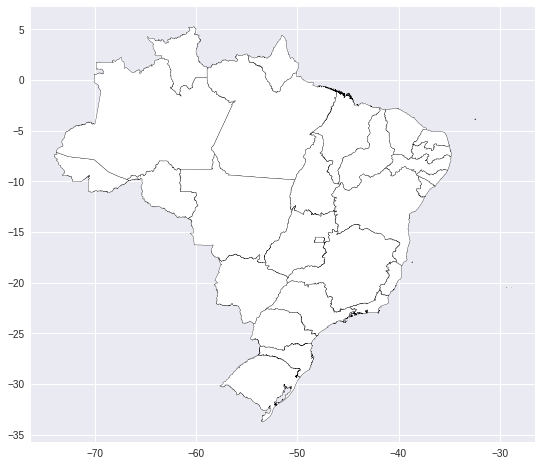

In [0]:
base = br.plot(color='white', edgecolor='black', figsize=(15,8))

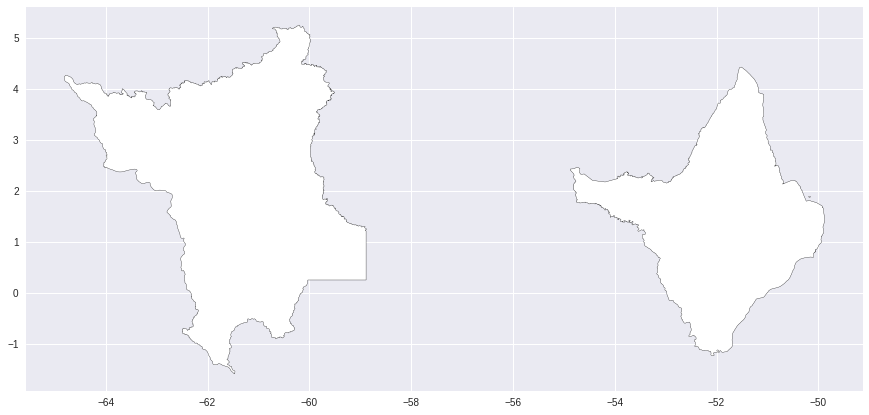

In [0]:
am = br[br['NM_ESTADO']=='AMAPÁ']
rr = br[br['NM_ESTADO']=='RORAIMA']
baze=am.plot(color='white', edgecolor='black', figsize=(15,8))
rr.plot(color='white', edgecolor='black', figsize=(15,8), ax=baze)

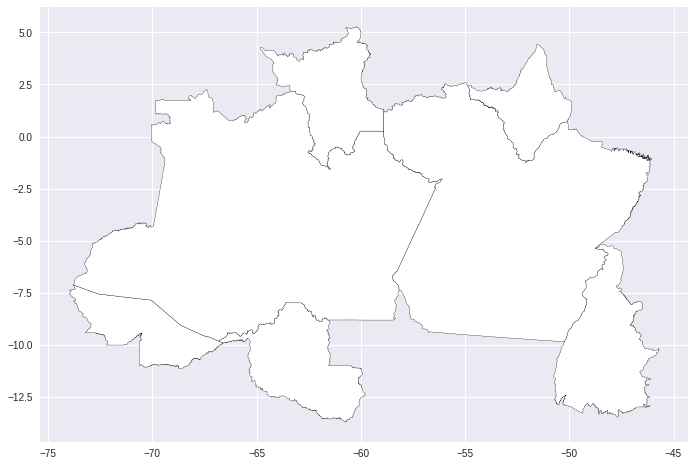

In [0]:
norte = br[br['NM_REGIAO']=='NORTE']
norte.plot(color='white', edgecolor='black', figsize=(15,8))

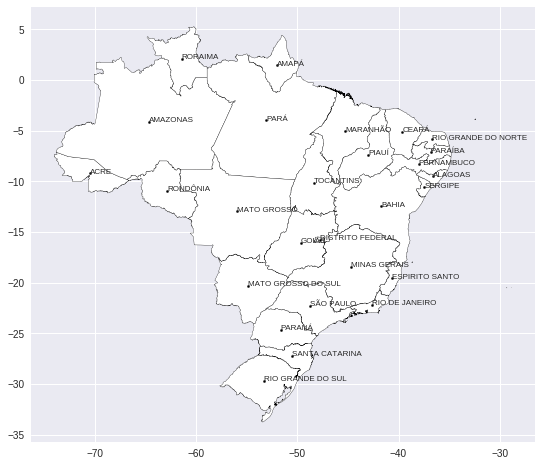

In [0]:
base = br.plot(color='white', edgecolor='black', figsize=(15,8))
centroides.plot(ax=base, marker='o', color='black', markersize=5)
texts = []

for x, y, label in zip(centroides.geometry.x, centroides.geometry.y, centroides['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 8))


## colocando dois gráficos em um para o site

### Região Norte

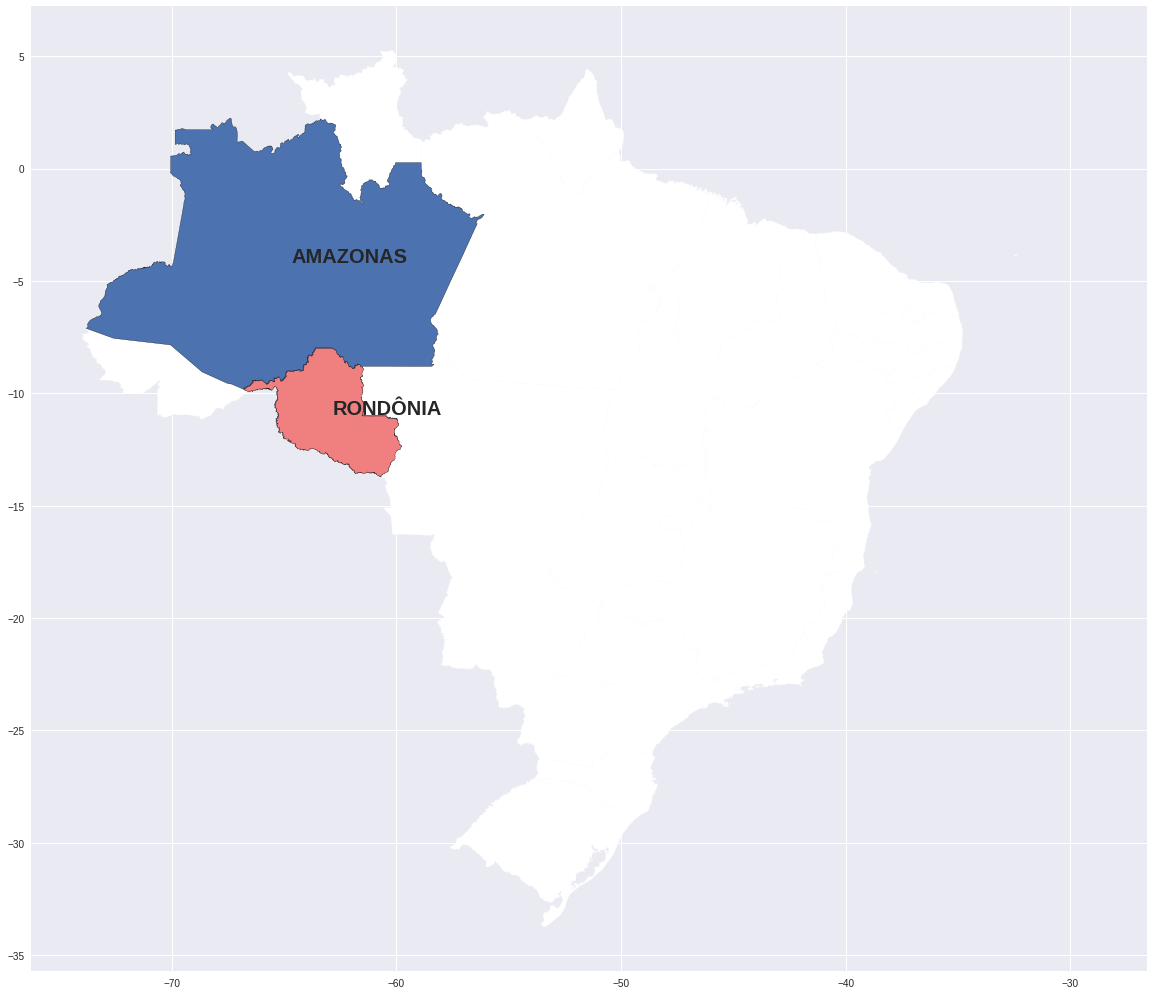

In [0]:
# Rondônia
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['RO', 'AM'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='RO'].plot(ax=base, edgecolor='black', color='lightcoral')


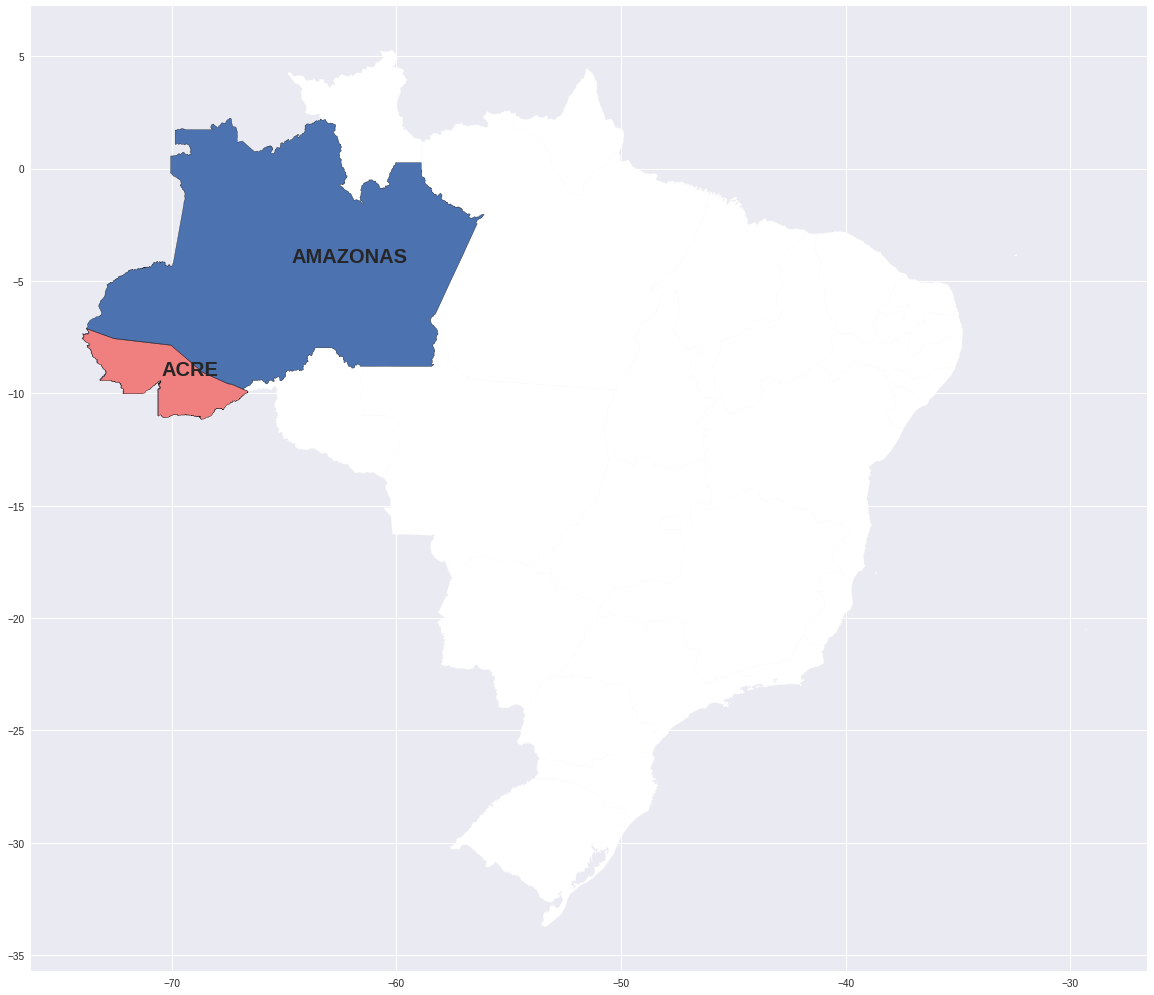

In [0]:
# Acre
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['AC', 'AM'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='AC'].plot(ax=base, edgecolor='black', color='lightcoral')

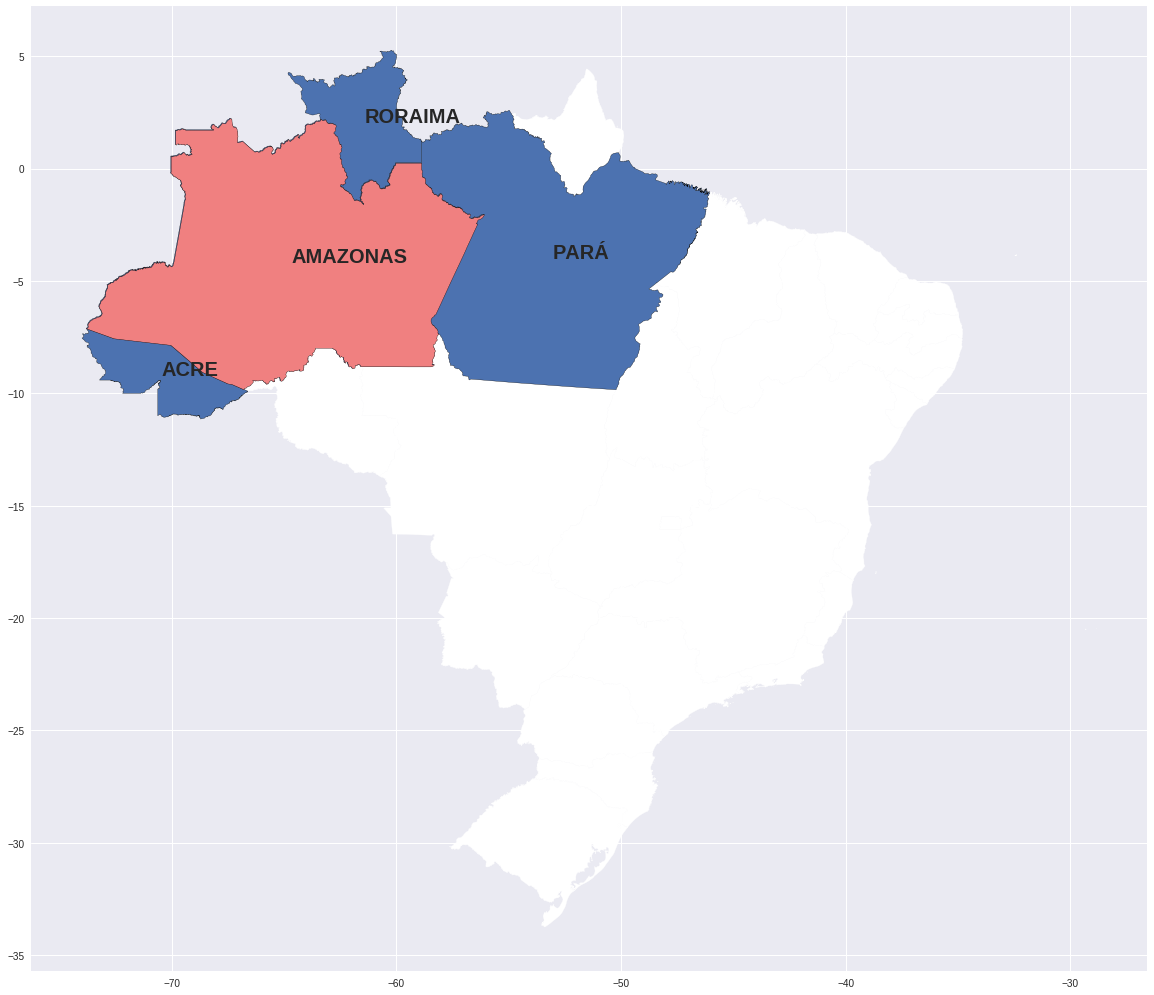

In [0]:
# Amazonas

base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides PA
br_pa= br[br.UF.isin(['AM','AC','RR','PA'])]
br_pa = gpd.GeoDataFrame(br_pa, geometry='centroides')

for x, y, label in zip(br_pa.geometry.x, br_pa.geometry.y, br_pa['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_pa = gpd.GeoDataFrame(br_pa, geometry='geometry')
    
# Estados de notificação forte
br_pa.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='AM'].plot(ax=base, edgecolor='black', color='lightcoral')

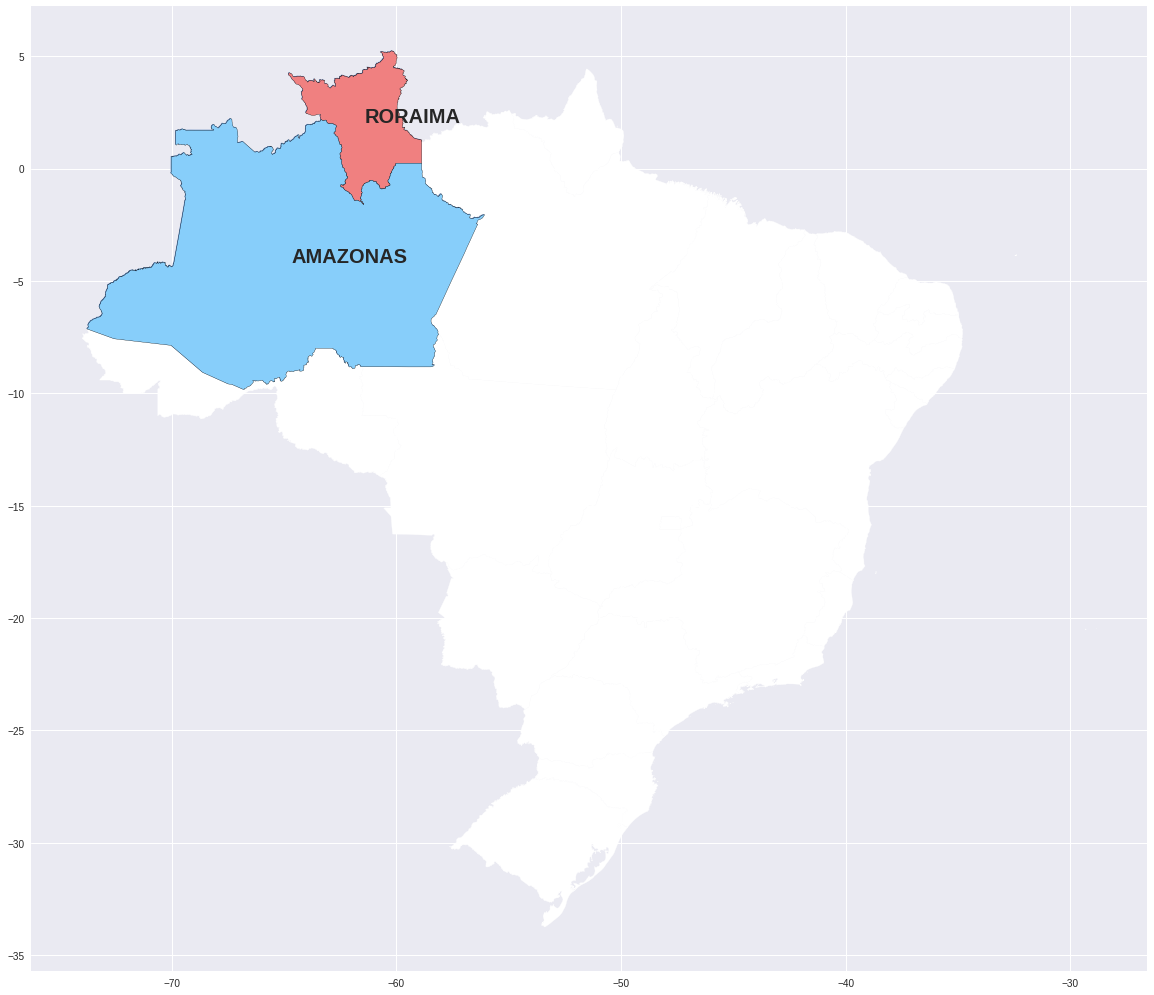

In [0]:
# Roraima

base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides PA
br_pa= br[br.UF.isin(['RR','AM'])]
br_pa = gpd.GeoDataFrame(br_pa, geometry='centroides')

for x, y, label in zip(br_pa.geometry.x, br_pa.geometry.y, br_pa['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_pa = gpd.GeoDataFrame(br_pa, geometry='geometry')
    
# Estados de notificação forte
br_pa.plot(ax=base)

# Estado de infecção
br[br['UF']=='RR'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fraca
br[br['UF']=='AM'].plot(ax=base, edgecolor='black', color='lightskyblue')

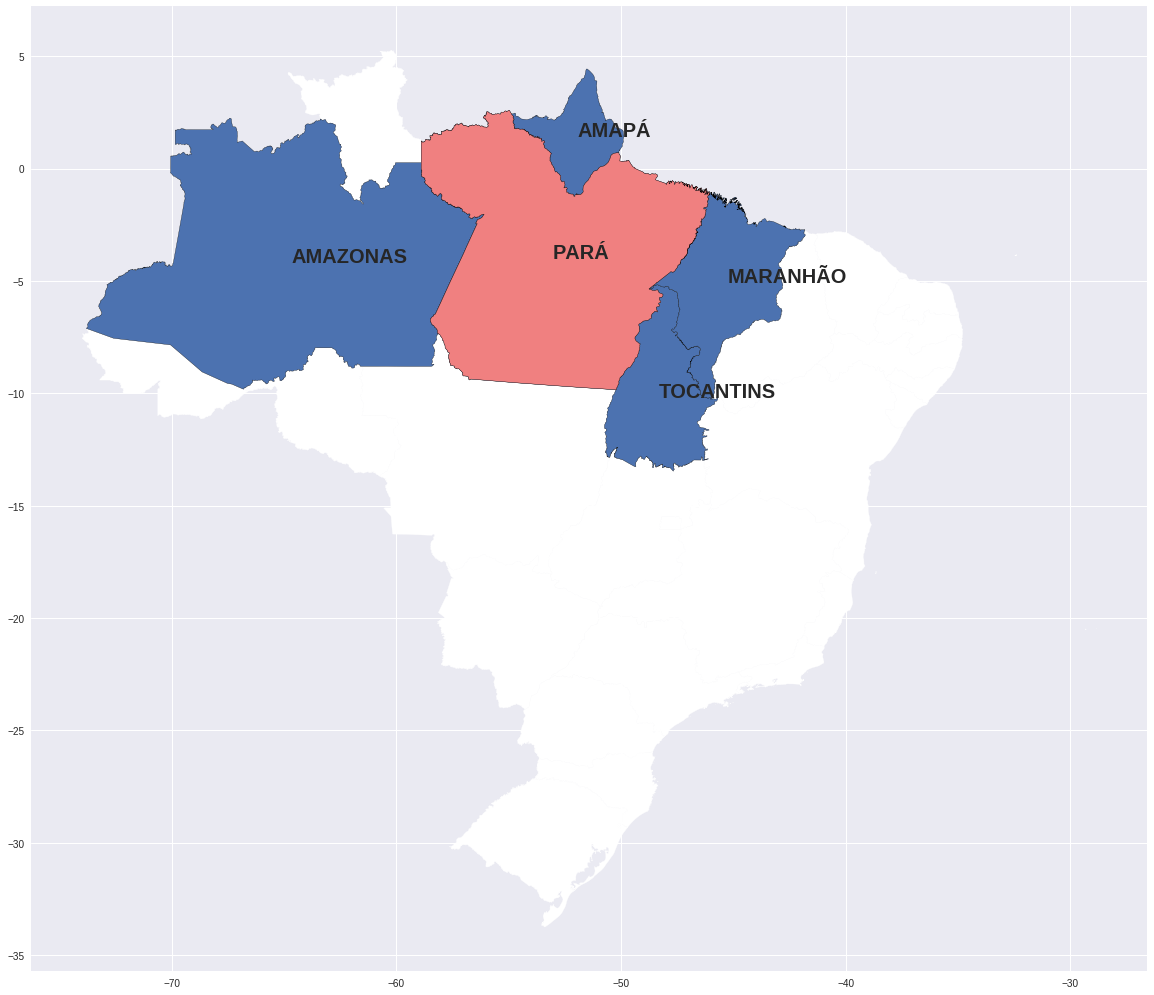

In [0]:
# Pará

base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides PA
br_pa= br[br.UF.isin(['AM','AP','TO','MA', 'PA'])]
br_pa = gpd.GeoDataFrame(br_pa, geometry='centroides')

for x, y, label in zip(br_pa.geometry.x, br_pa.geometry.y, br_pa['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_pa = gpd.GeoDataFrame(br_pa, geometry='geometry')
    
# Estados de notificação forte
br_pa.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='PA'].plot(ax=base, edgecolor='black', color='lightcoral')


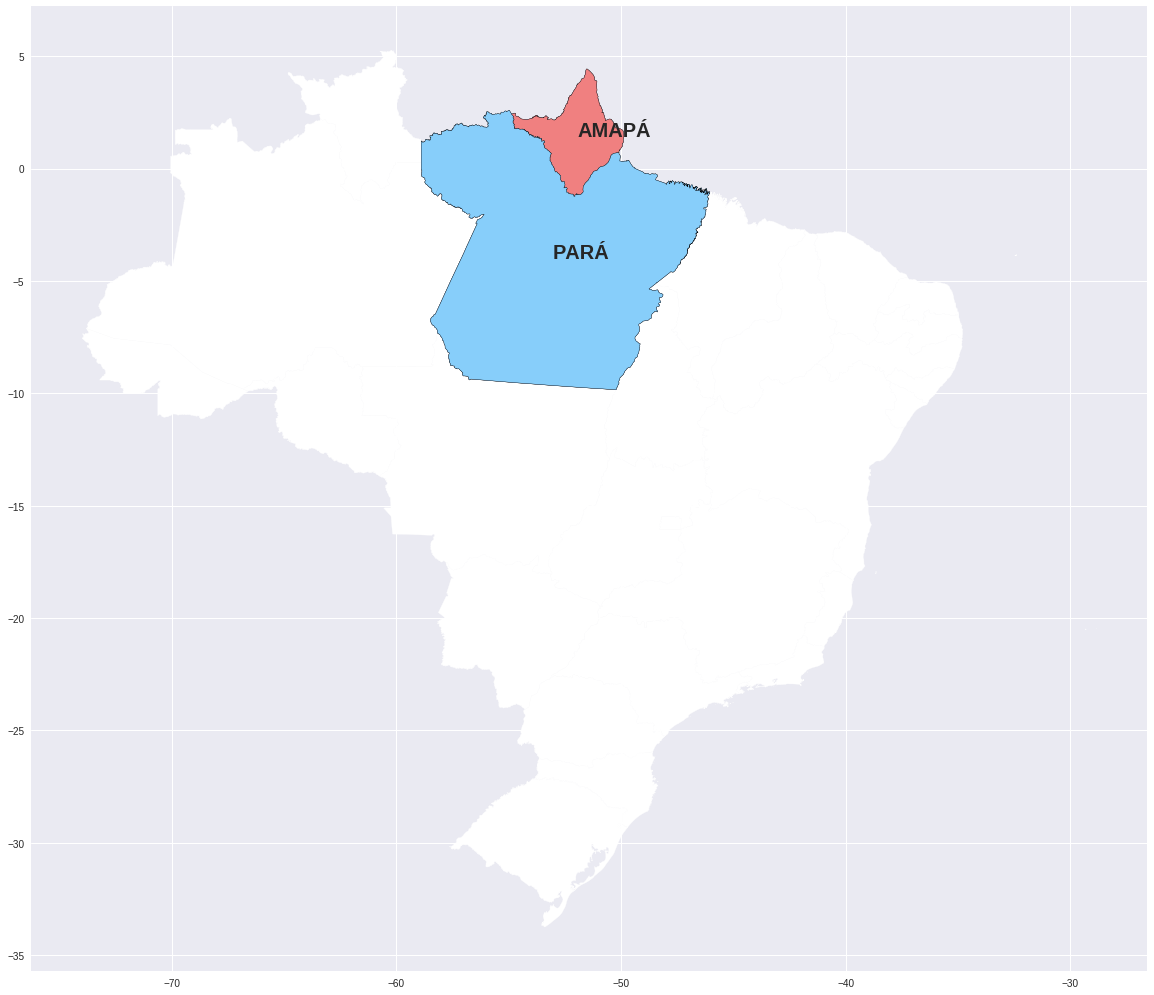

In [0]:
# Amapá

base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides PA
br_pa= br[br.UF.isin(['AP','PA'])]
br_pa = gpd.GeoDataFrame(br_pa, geometry='centroides')

for x, y, label in zip(br_pa.geometry.x, br_pa.geometry.y, br_pa['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_pa = gpd.GeoDataFrame(br_pa, geometry='geometry')
    
# Estados de notificação forte
br_pa.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='AP'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fraca
br[br['UF']=='PA'].plot(ax=base, edgecolor='black', color='lightskyblue')

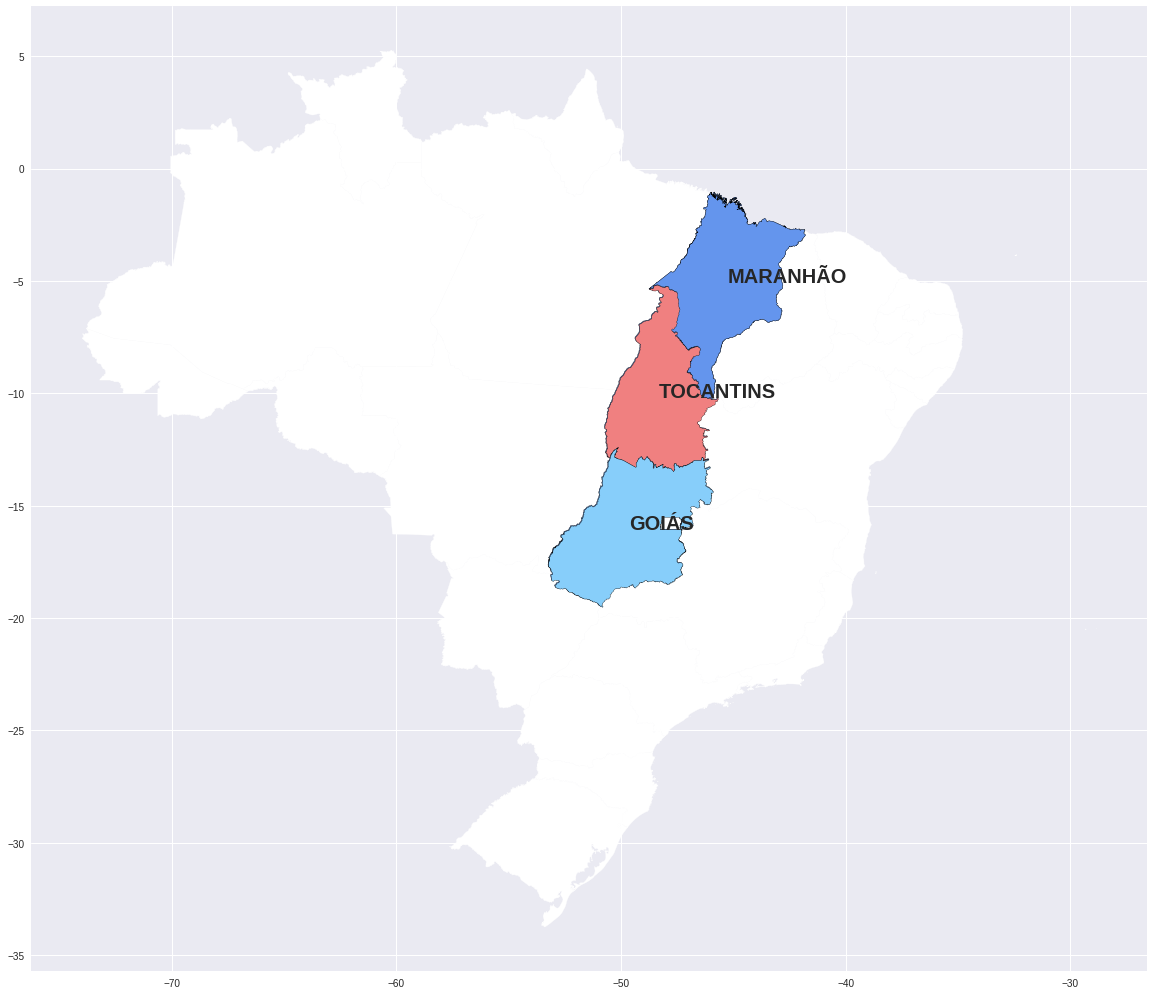

In [0]:
# Tocatins
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['TO', 'MA', 'GO'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='TO'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos
## entre 0.4 e 0.5
br[br['UF']=='GO'].plot(ax=base, edgecolor='black', color='lightskyblue')

## entre 0.6 e 0.8
br[br['UF']=='MA'].plot(ax=base, edgecolor='black', color='cornflowerblue')


### Região Nordeste

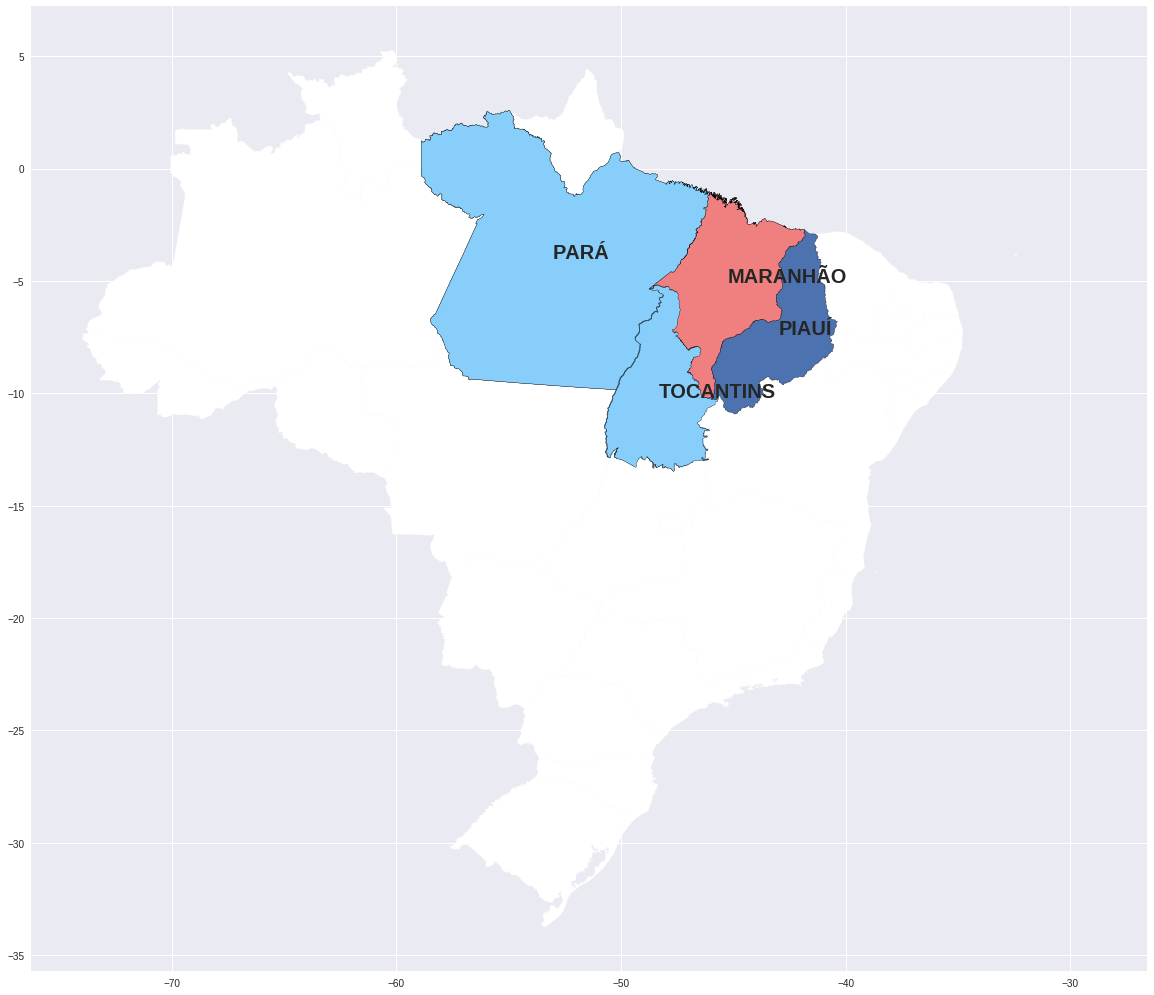

In [0]:
# Maranhão
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['MA', 'PA', 'TO','PI'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='MA'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos
## entre 0.4 e 0.5
br[br['UF']=='TO'].plot(ax=base, edgecolor='black', color='lightskyblue')
br[br['UF']=='PA'].plot(ax=base, edgecolor='black', color='lightskyblue')


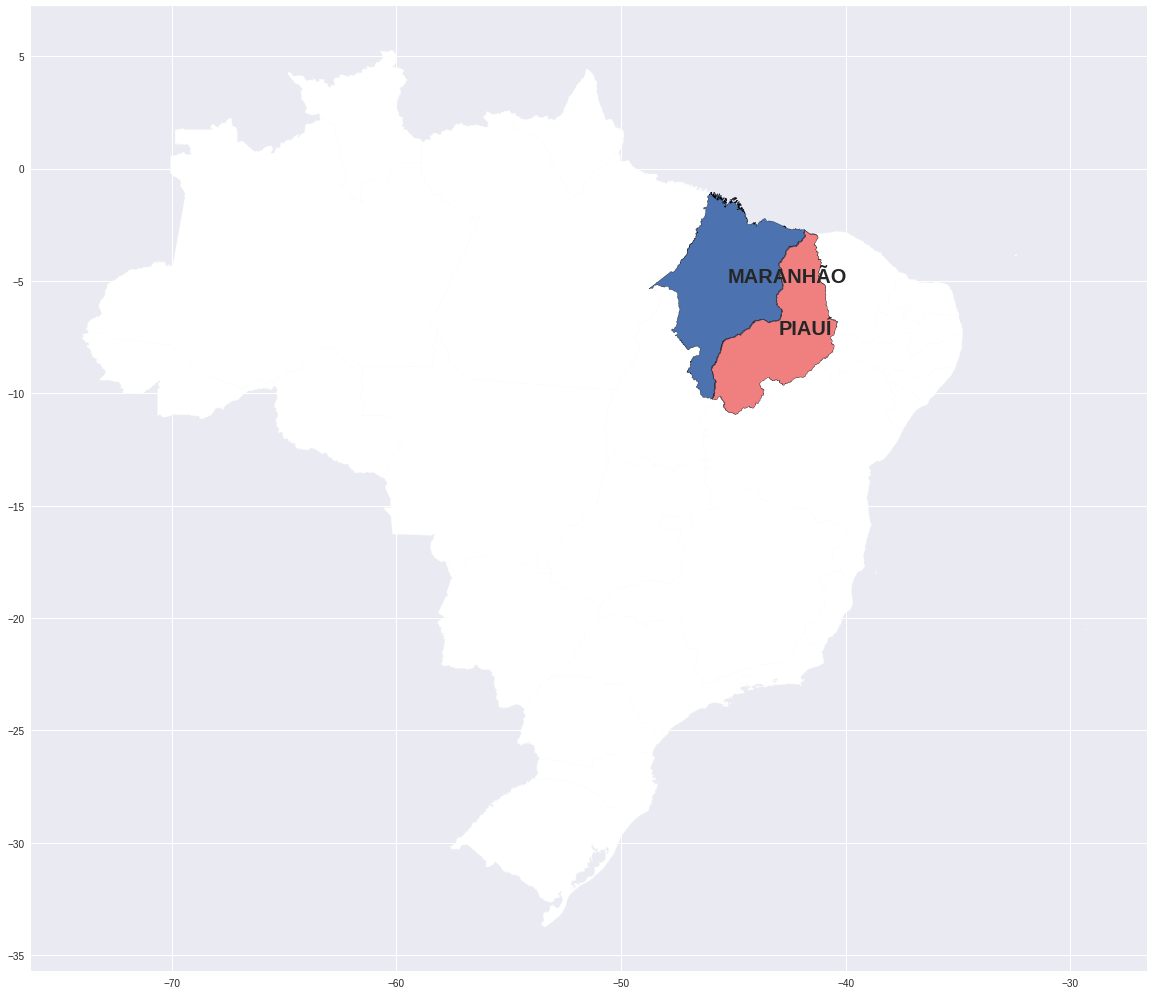

In [0]:
# Piauí
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['MA','PI'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='PI'].plot(ax=base, edgecolor='black', color='lightcoral')

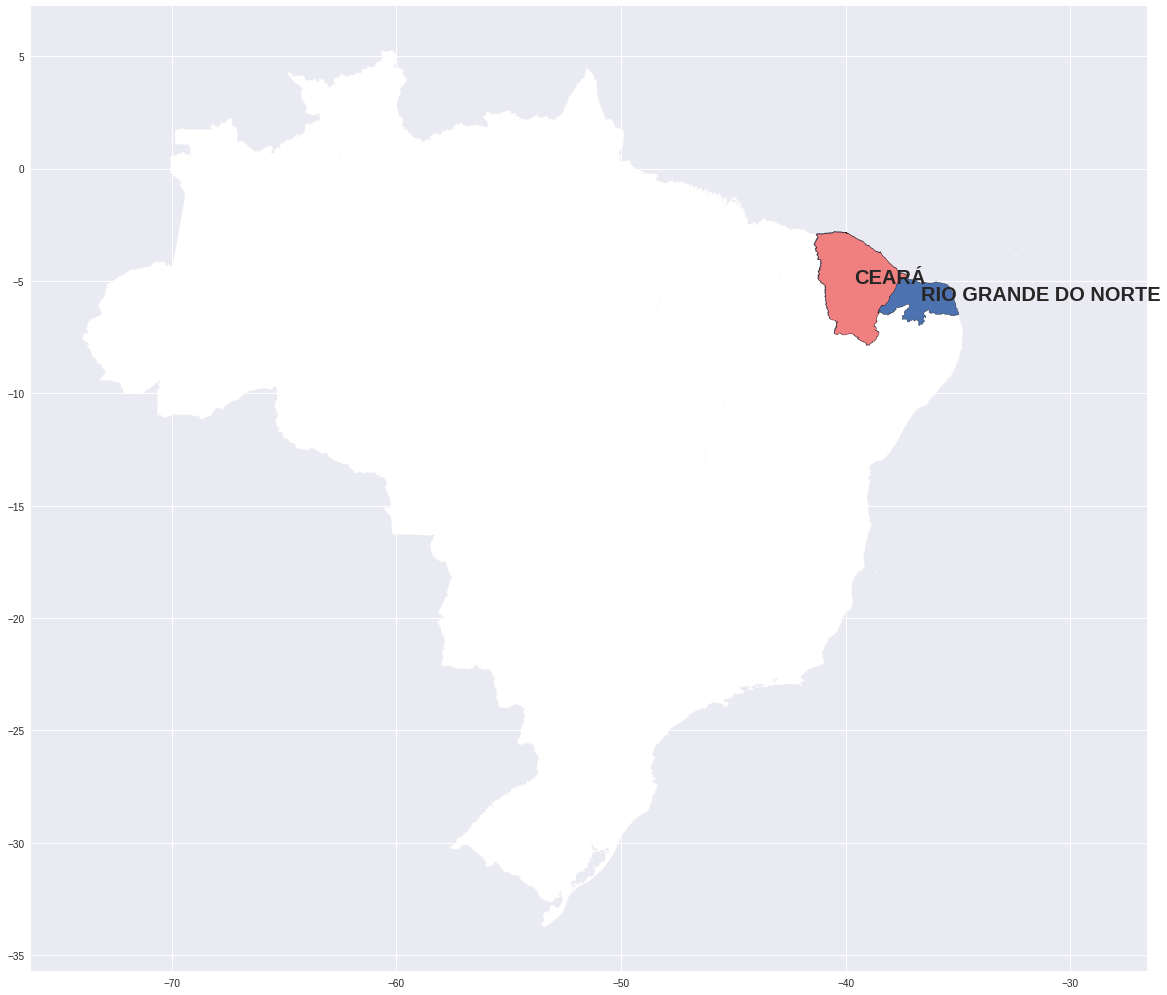

In [0]:
# Ceará
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['CE','RN'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='CE'].plot(ax=base, edgecolor='black', color='lightcoral')

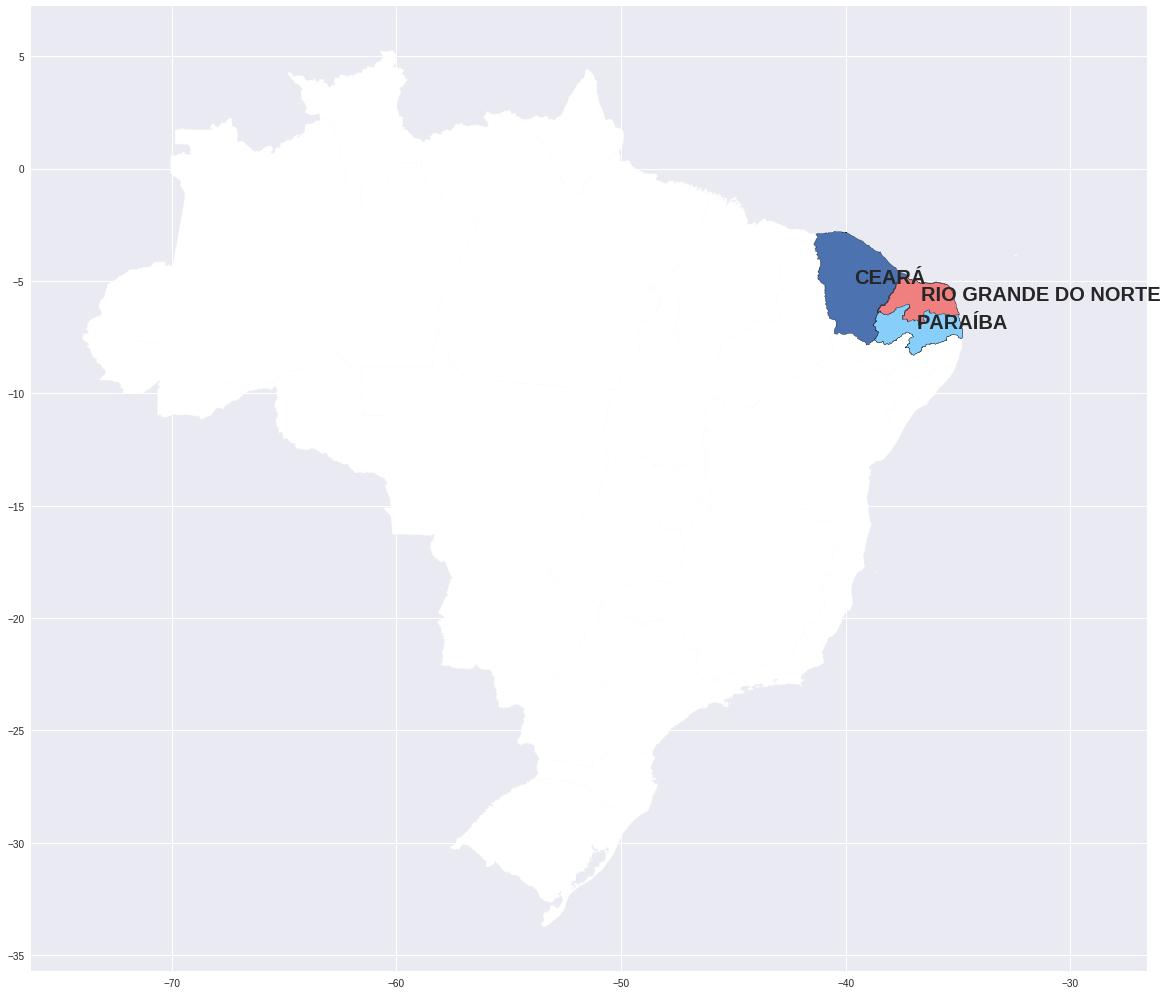

In [0]:
# Rio Grande do Norte
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['RN', 'CE', 'PB'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='RN'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos
## entre 0.4 e 0.5
br[br['UF']=='PB'].plot(ax=base, edgecolor='black', color='lightskyblue')

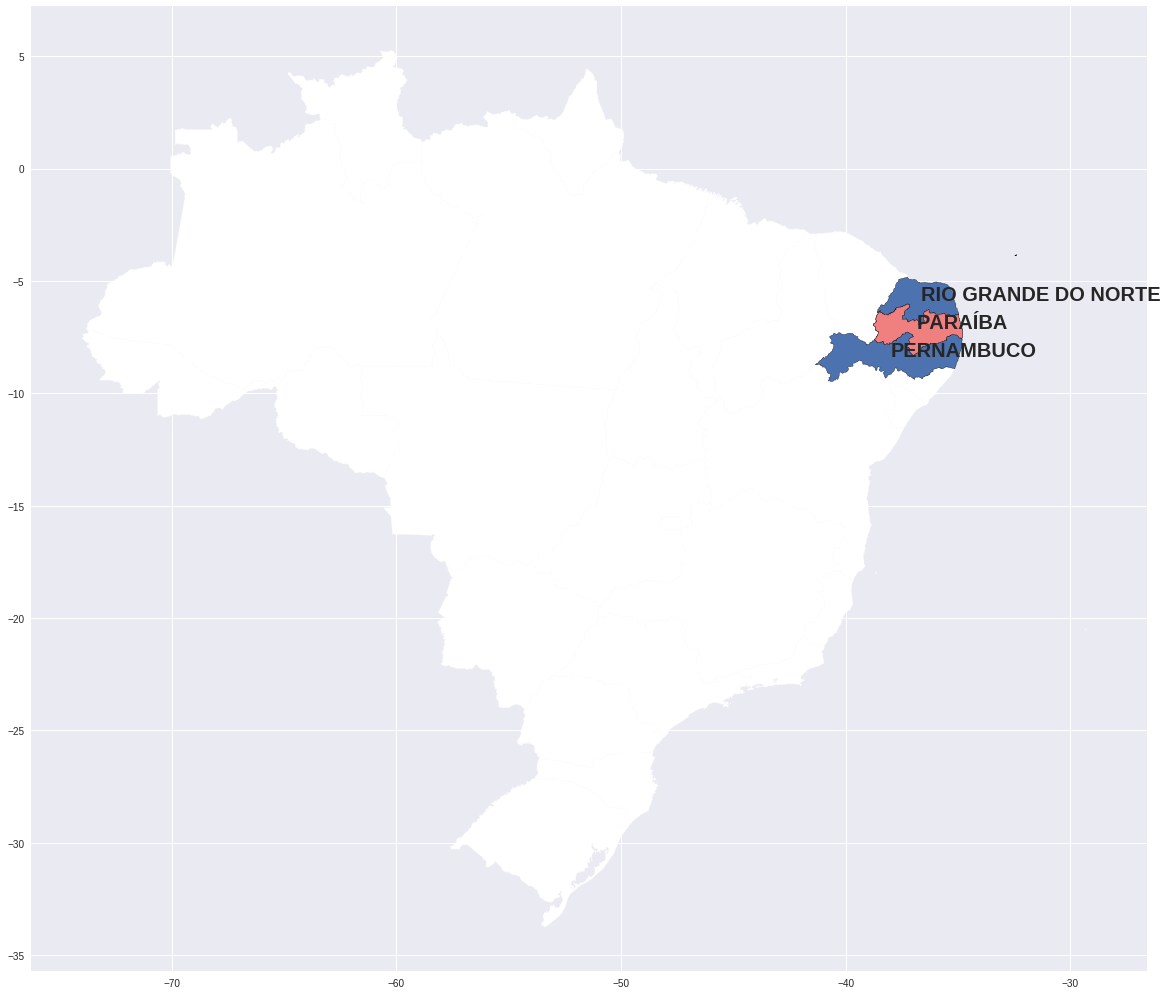

In [0]:
# Paraíba
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['RN', 'PE', 'PB'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='PB'].plot(ax=base, edgecolor='black', color='lightcoral')

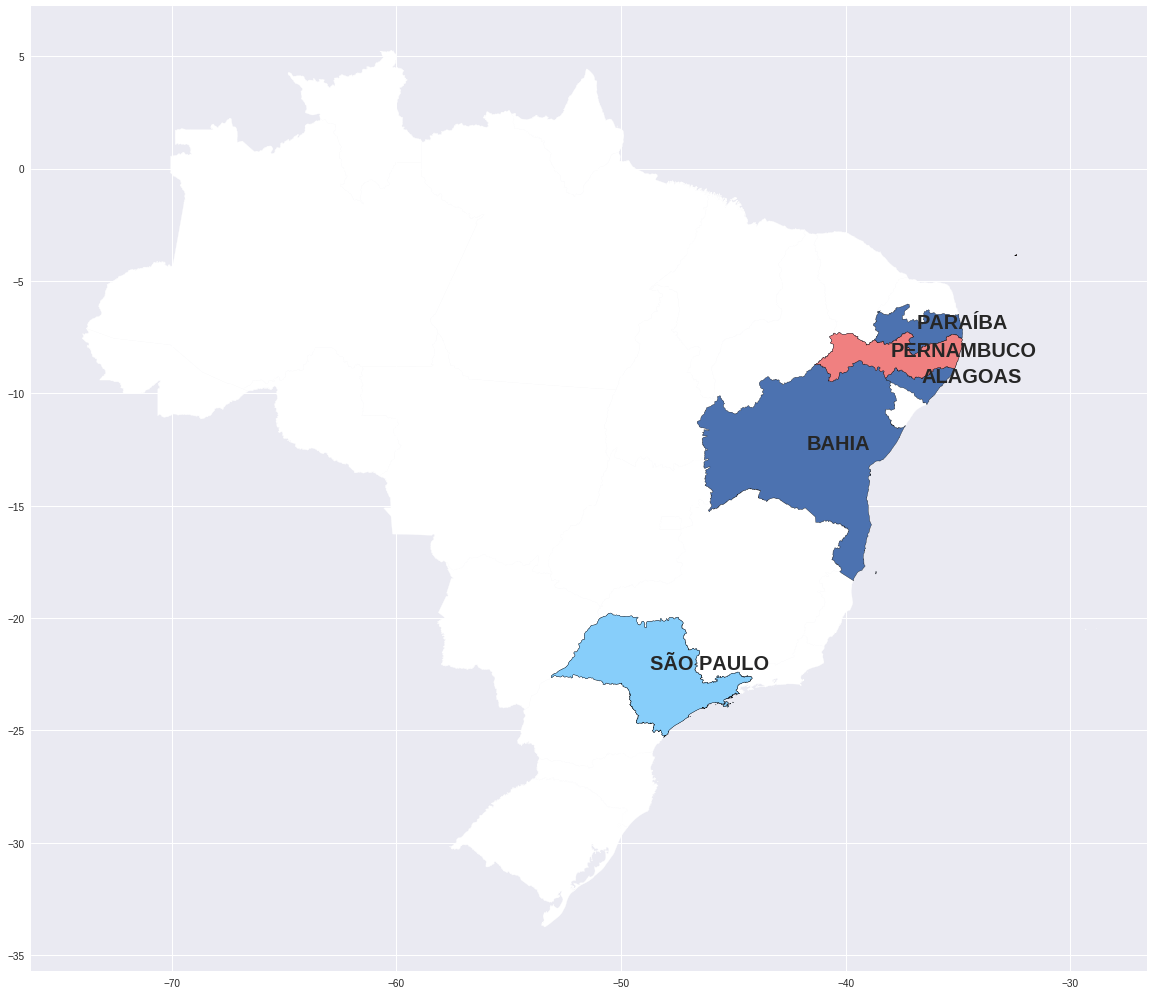

In [0]:
# Pernambuco
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['PE','PB', 'AL', 'BA','SP'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='PE'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos
## entre 0.4 e 0.5
br[br['UF']=='SP'].plot(ax=base, edgecolor='black', color='lightskyblue')

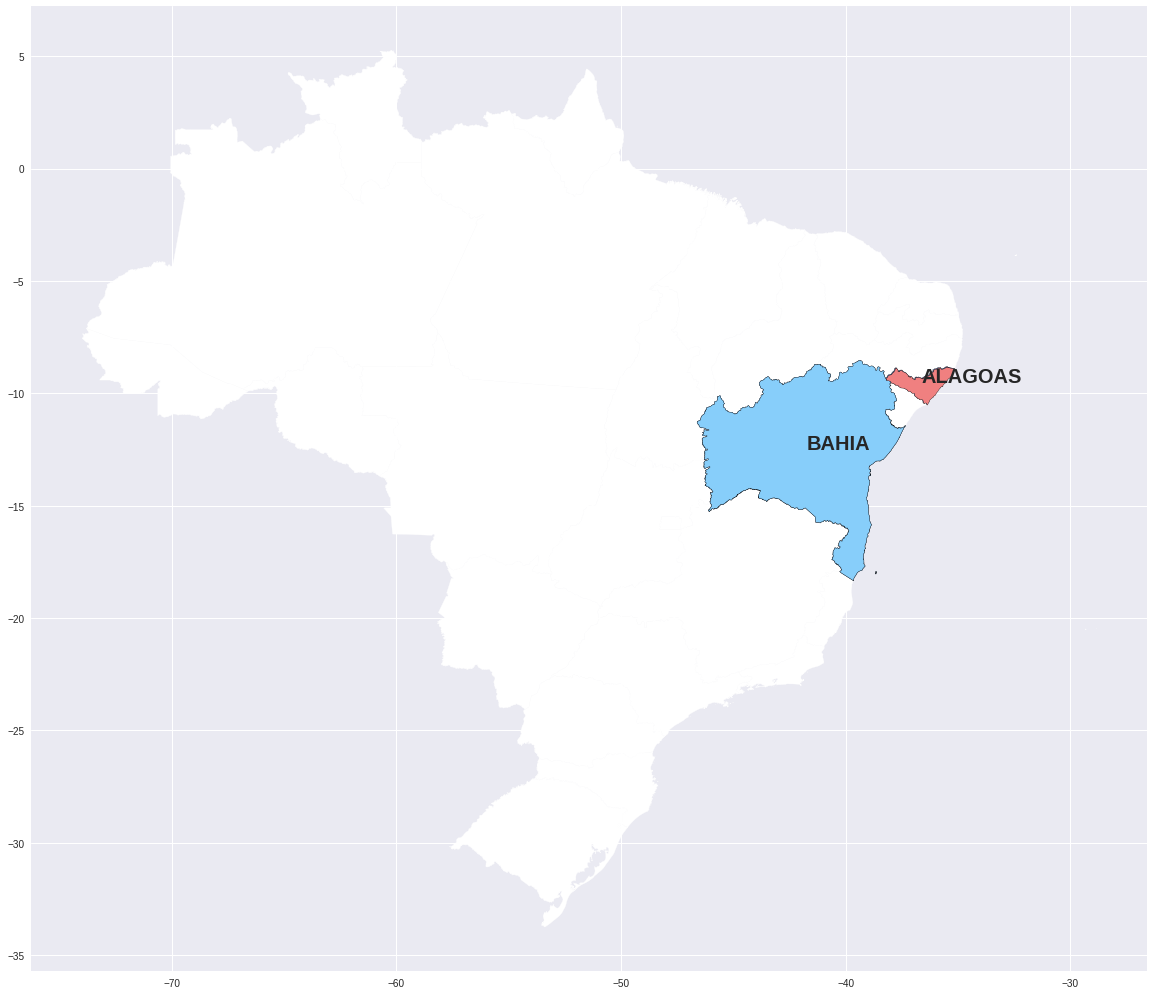

In [0]:
# Alagoas
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['AL','BA'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='AL'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos
## entre 0.4 e 0.5
br[br['UF']=='BA'].plot(ax=base, edgecolor='black', color='lightskyblue')

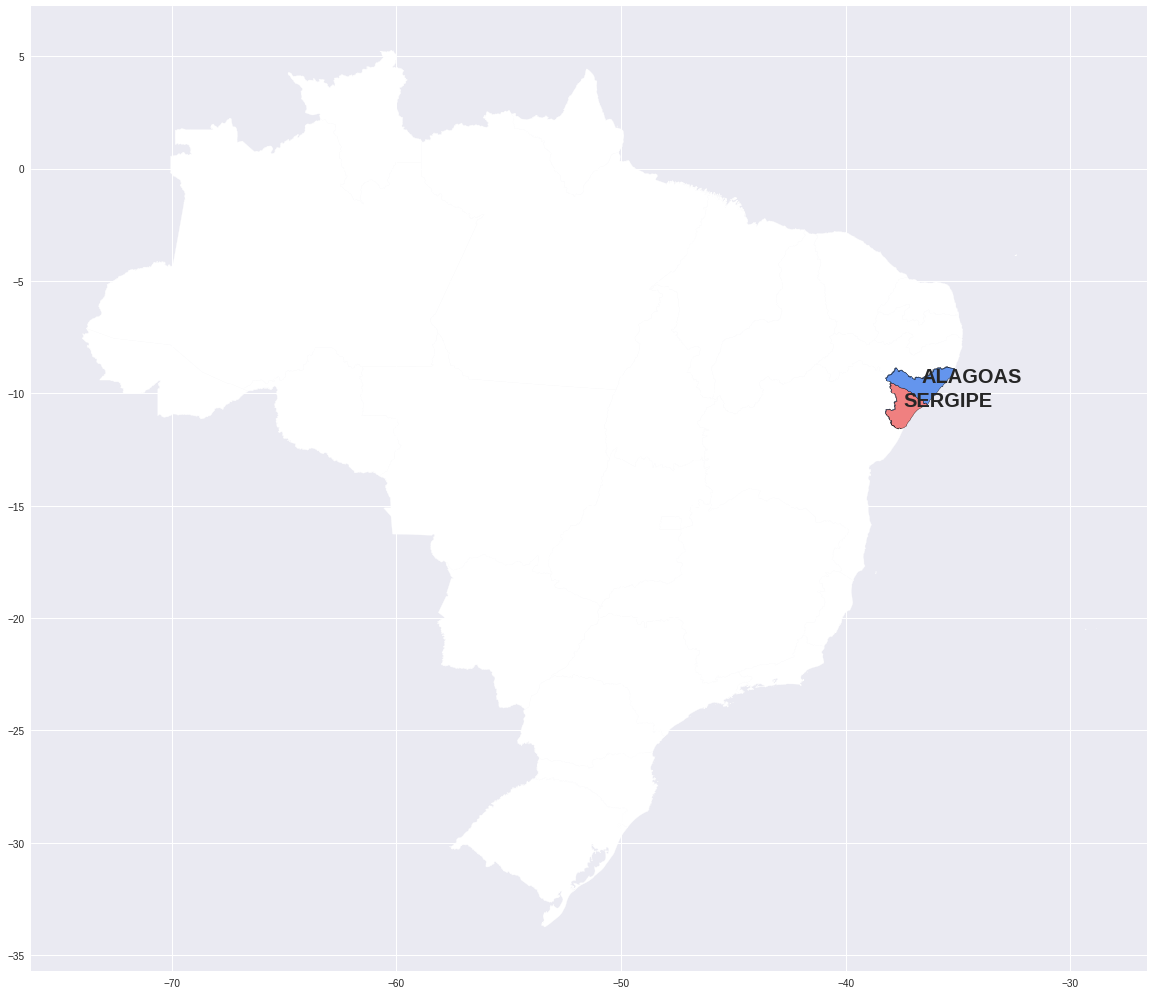

In [0]:
# Sergipe
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['SE', 'AL'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='SE'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos

## entre 0.6 e 0.8
br[br['UF']=='AL'].plot(ax=base, edgecolor='black', color='cornflowerblue')



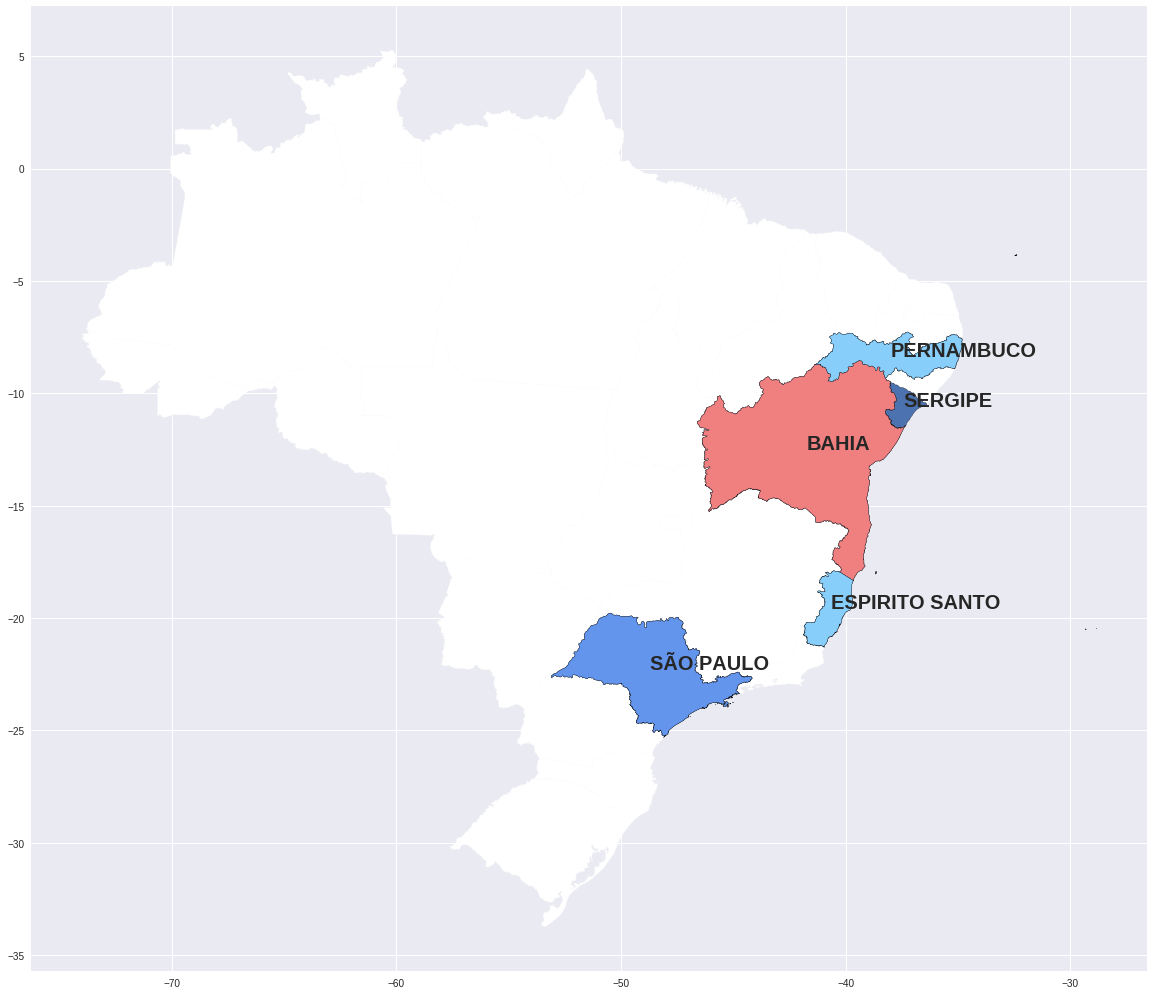

In [0]:
# Bahia
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['BA', 'PE', 'SE','ES','SP'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='BA'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos
## entre 0.4 e 0.5
br[br['UF']=='PE'].plot(ax=base, edgecolor='black', color='lightskyblue')
br[br['UF']=='ES'].plot(ax=base, edgecolor='black', color='lightskyblue')

## entre 0.6 e 0.8
br[br['UF']=='SP'].plot(ax=base, edgecolor='black', color='cornflowerblue')


### Região Sudeste

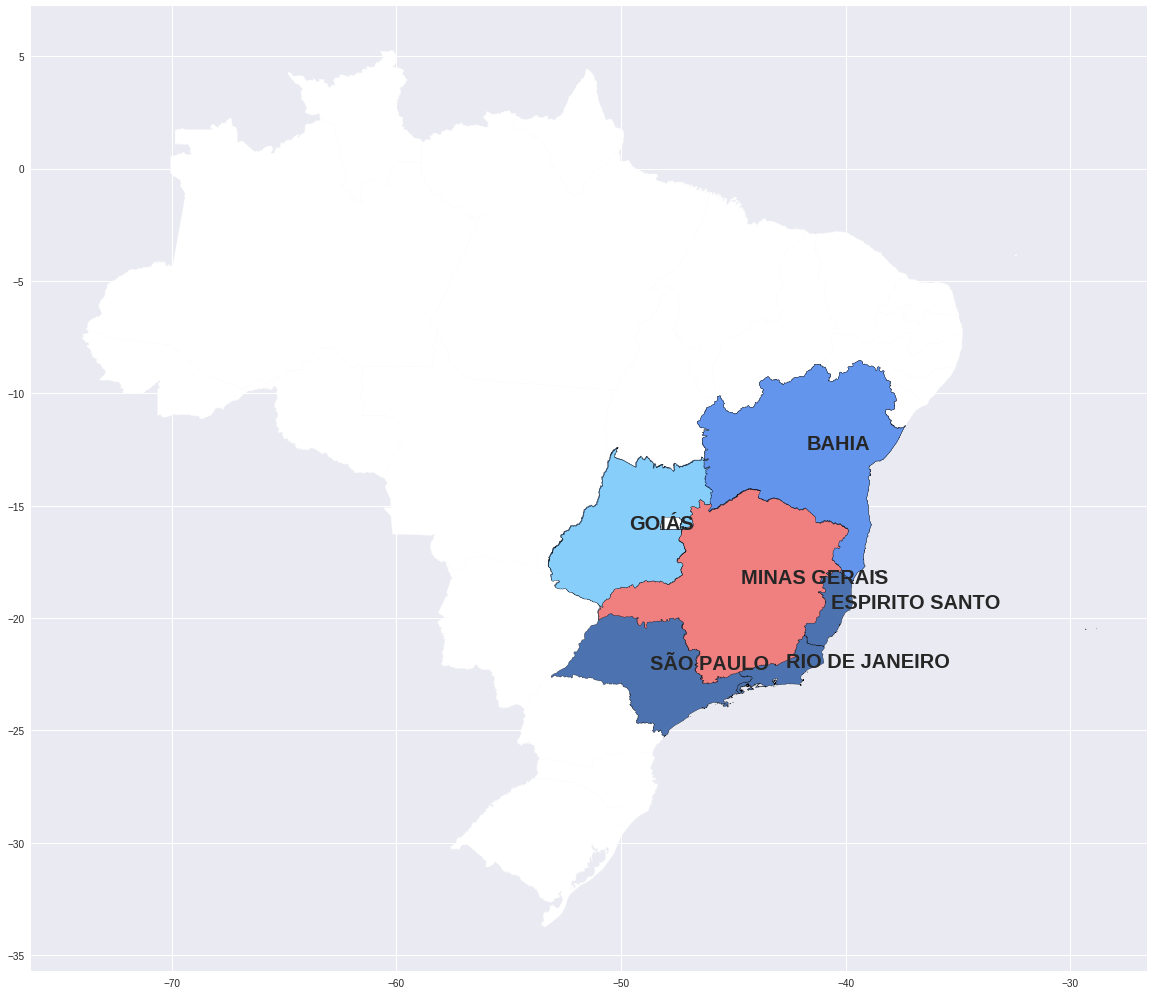

In [0]:
# Minas Gerais
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['MG', 'BA', 'RJ','ES','SP',"GO"])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='MG'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos
## entre 0.4 e 0.5
br[br['UF']=='GO'].plot(ax=base, edgecolor='black', color='lightskyblue')


## entre 0.6 e 0.8
br[br['UF']=='BA'].plot(ax=base, edgecolor='black', color='cornflowerblue')

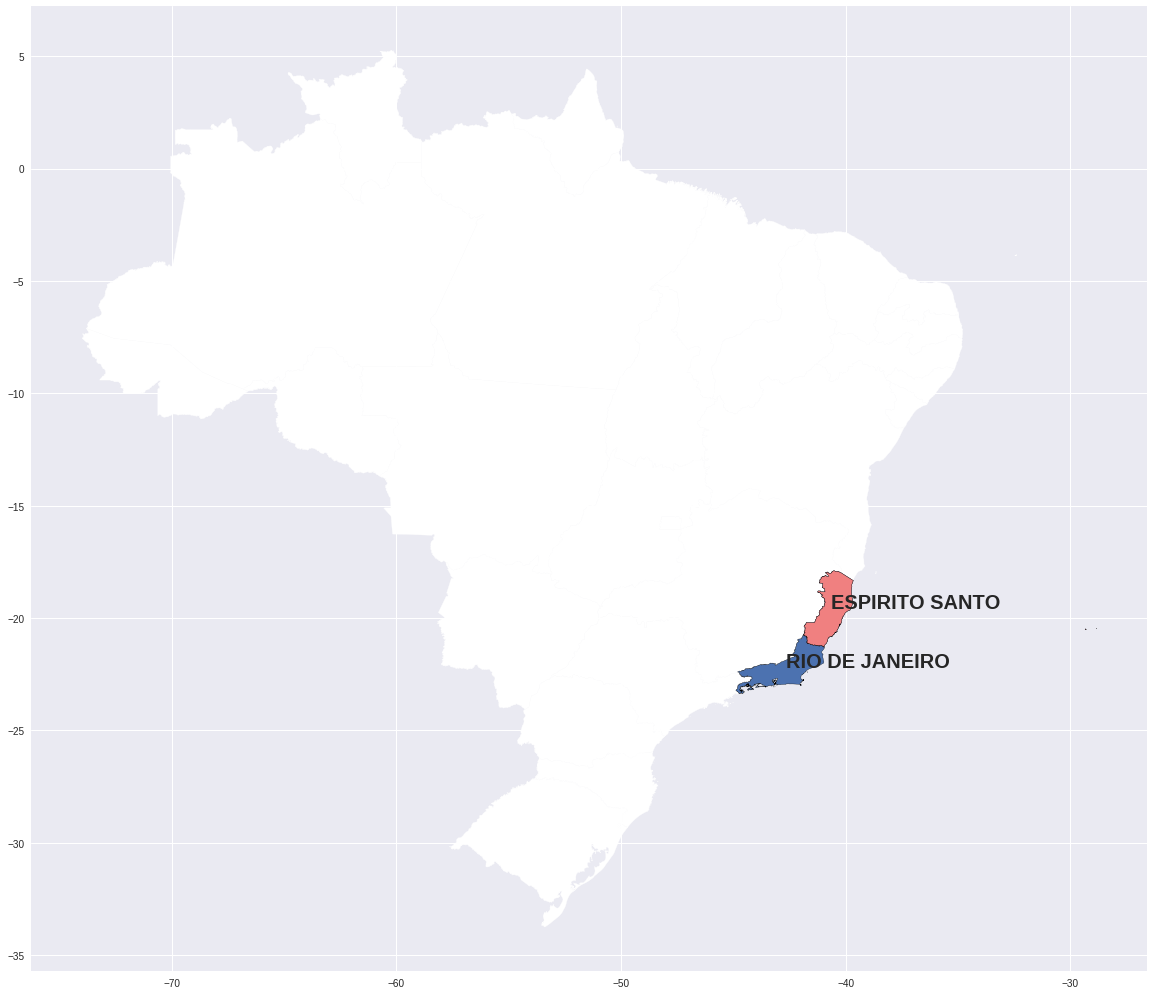

In [0]:
# Espírito Santo
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['ES', 'RJ'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='ES'].plot(ax=base, edgecolor='black', color='lightcoral')


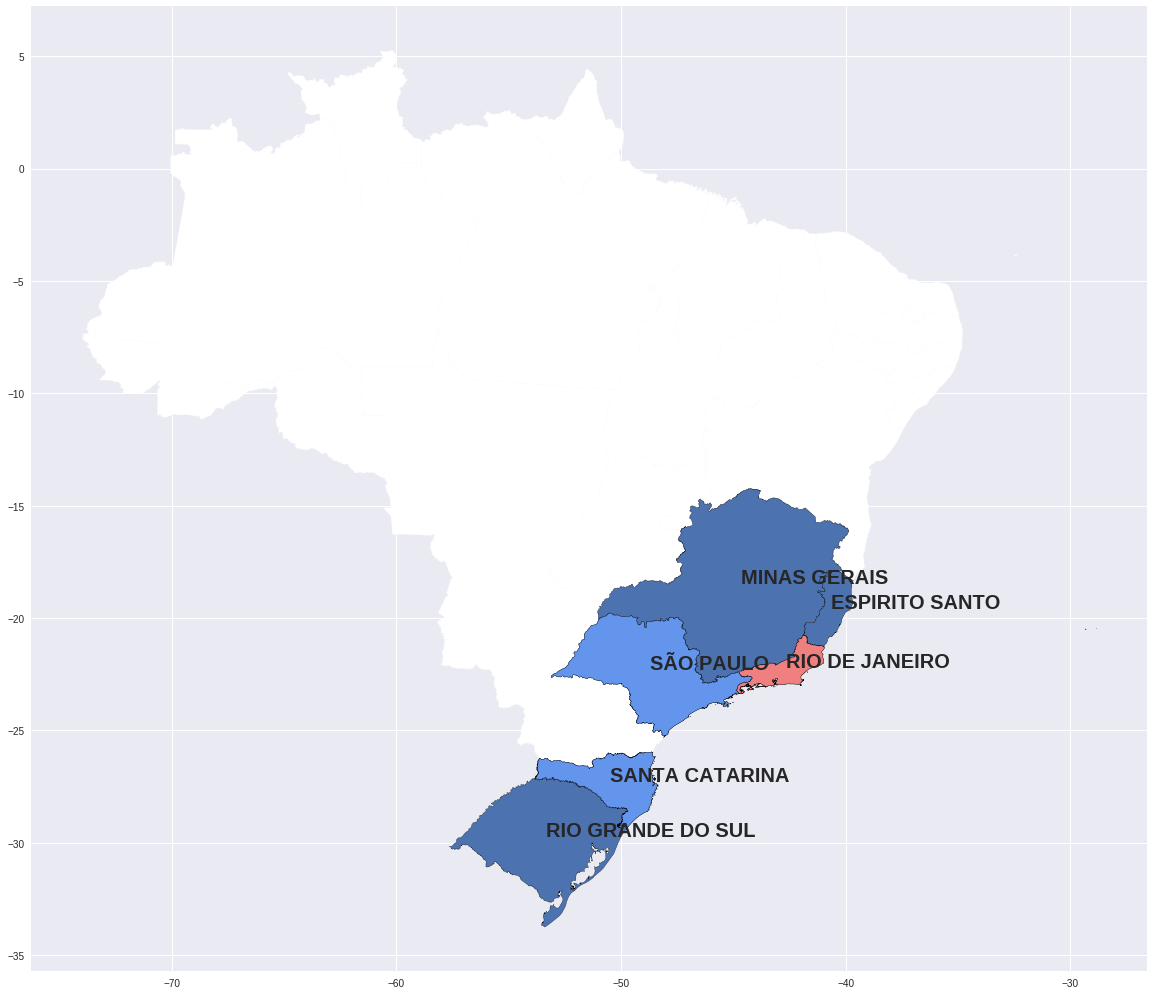

In [0]:
# Rio de Janeiro
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['RJ','MG','ES','SP','SC','RS'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='RJ'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos

## entre 0.6 e 0.8
br[br['UF']=='SP'].plot(ax=base, edgecolor='black', color='cornflowerblue')
br[br['UF']=='SC'].plot(ax=base, edgecolor='black', color='cornflowerblue')

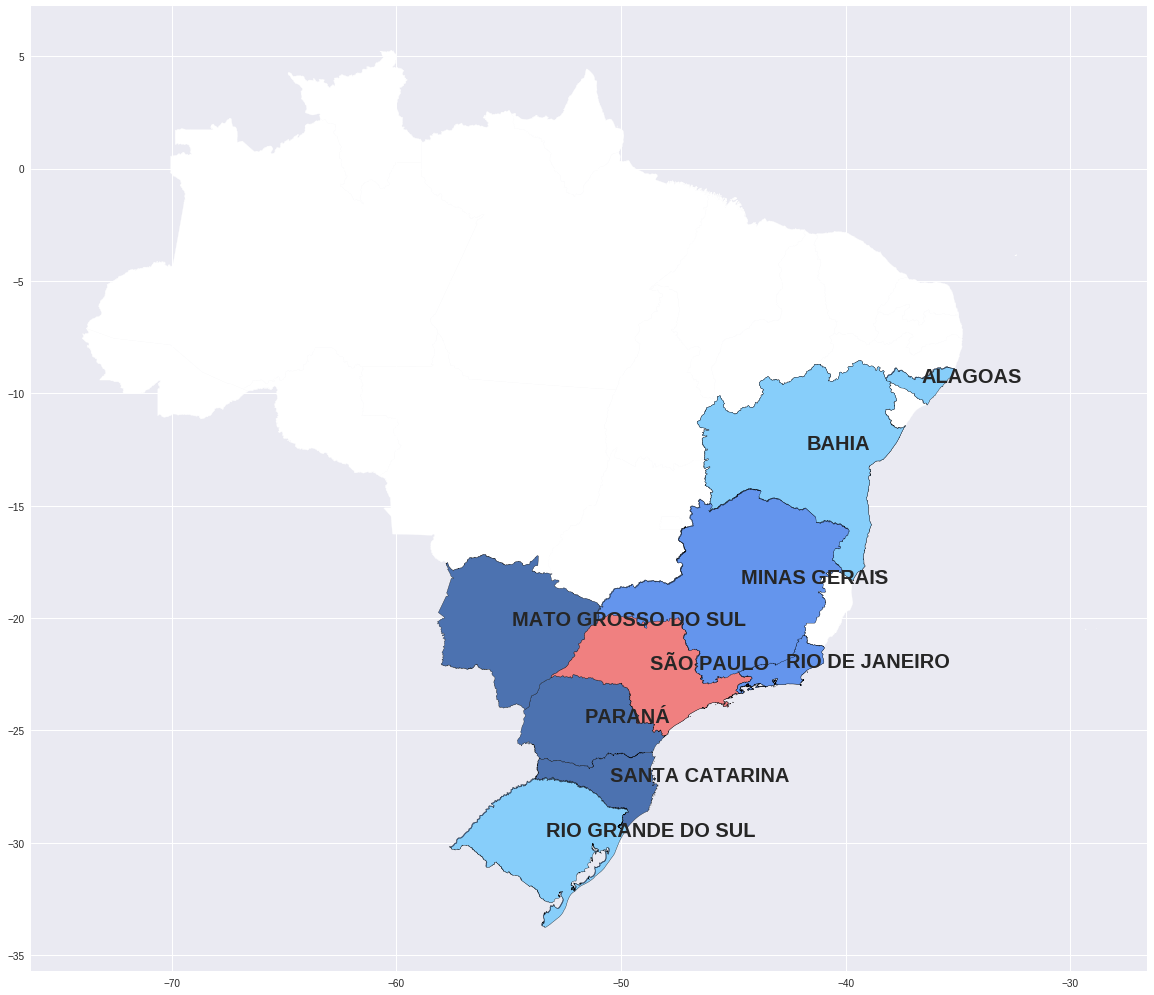

In [0]:
# São Paulo
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['SP', 'SC', 'PR','MS','MG','RS','RJ','BA','AL'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='SP'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos
## entre 0.4 e 0.5
br[br['UF']=='BA'].plot(ax=base, edgecolor='black', color='lightskyblue')
br[br['UF']=='AL'].plot(ax=base, edgecolor='black', color='lightskyblue')
br[br['UF']=='RS'].plot(ax=base, edgecolor='black', color='lightskyblue')

## entre 0.6 e 0.8
br[br['UF']=='MG'].plot(ax=base, edgecolor='black', color='cornflowerblue')
br[br['UF']=='RJ'].plot(ax=base, edgecolor='black', color='cornflowerblue')




### Região Sul

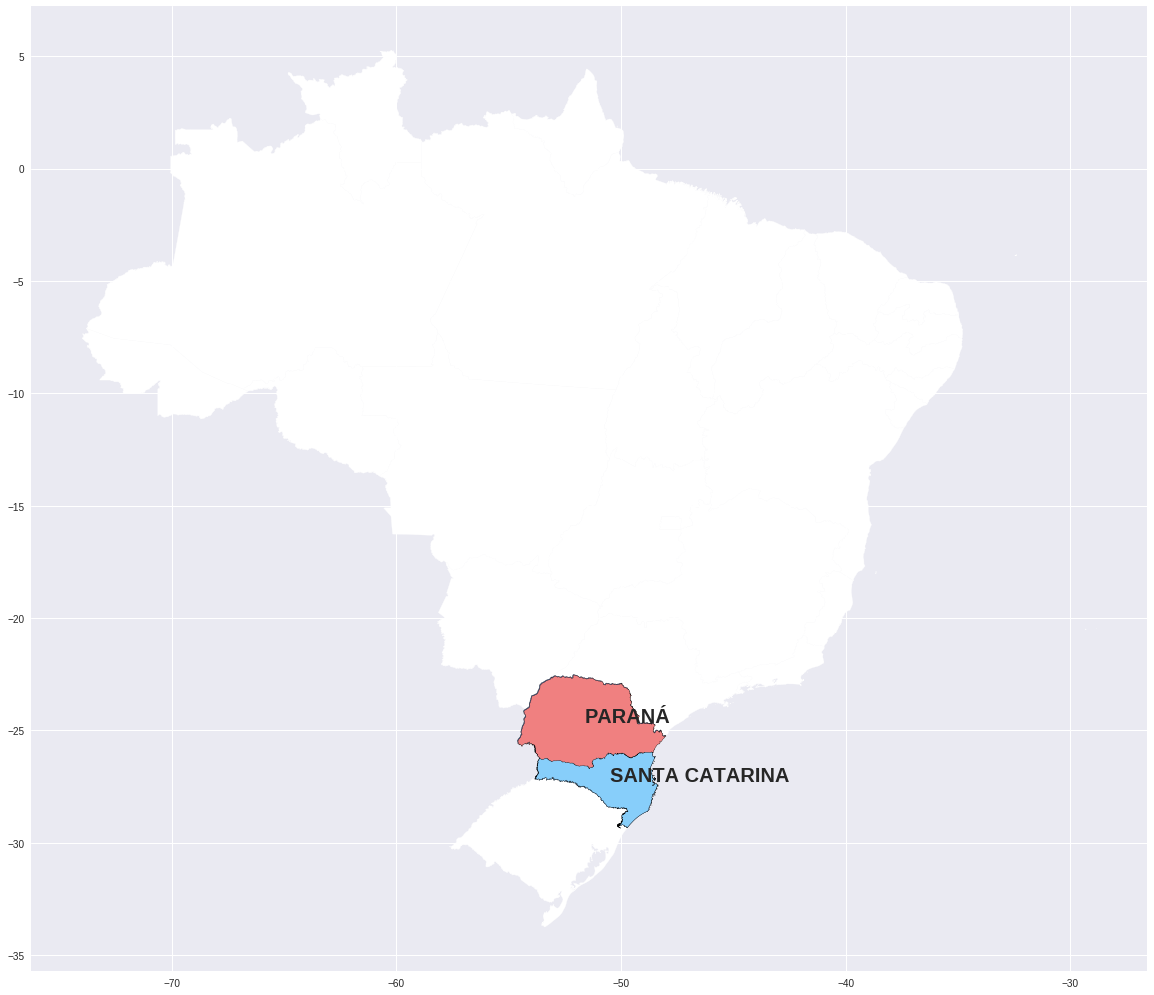

In [0]:
# Paraná
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['PR','SC'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='PR'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos
## entre 0.4 e 0.5
br[br['UF']=='SC'].plot(ax=base, edgecolor='black', color='lightskyblue')



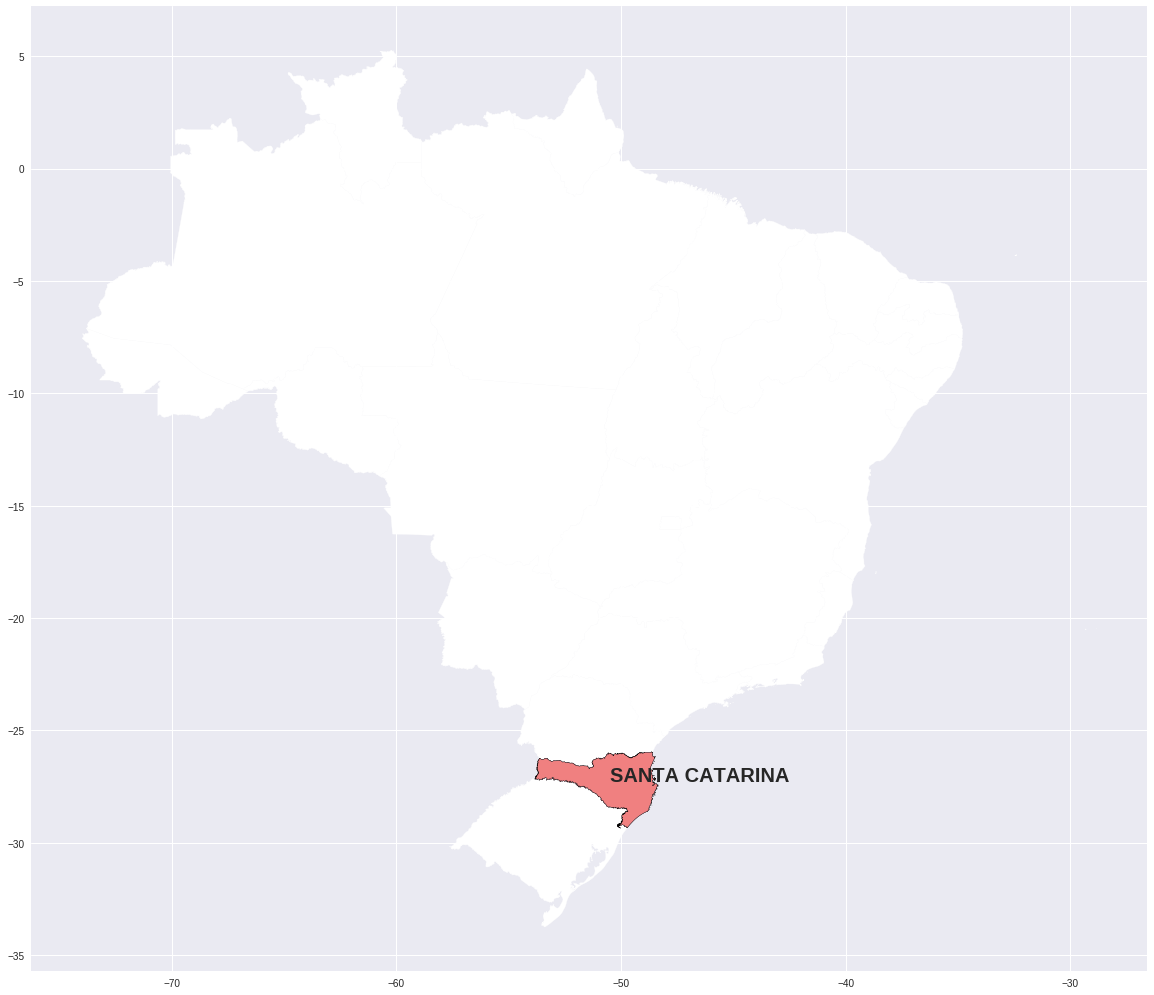

In [0]:
# Santa Catarina
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['SC'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='SC'].plot(ax=base, edgecolor='black', color='lightcoral')



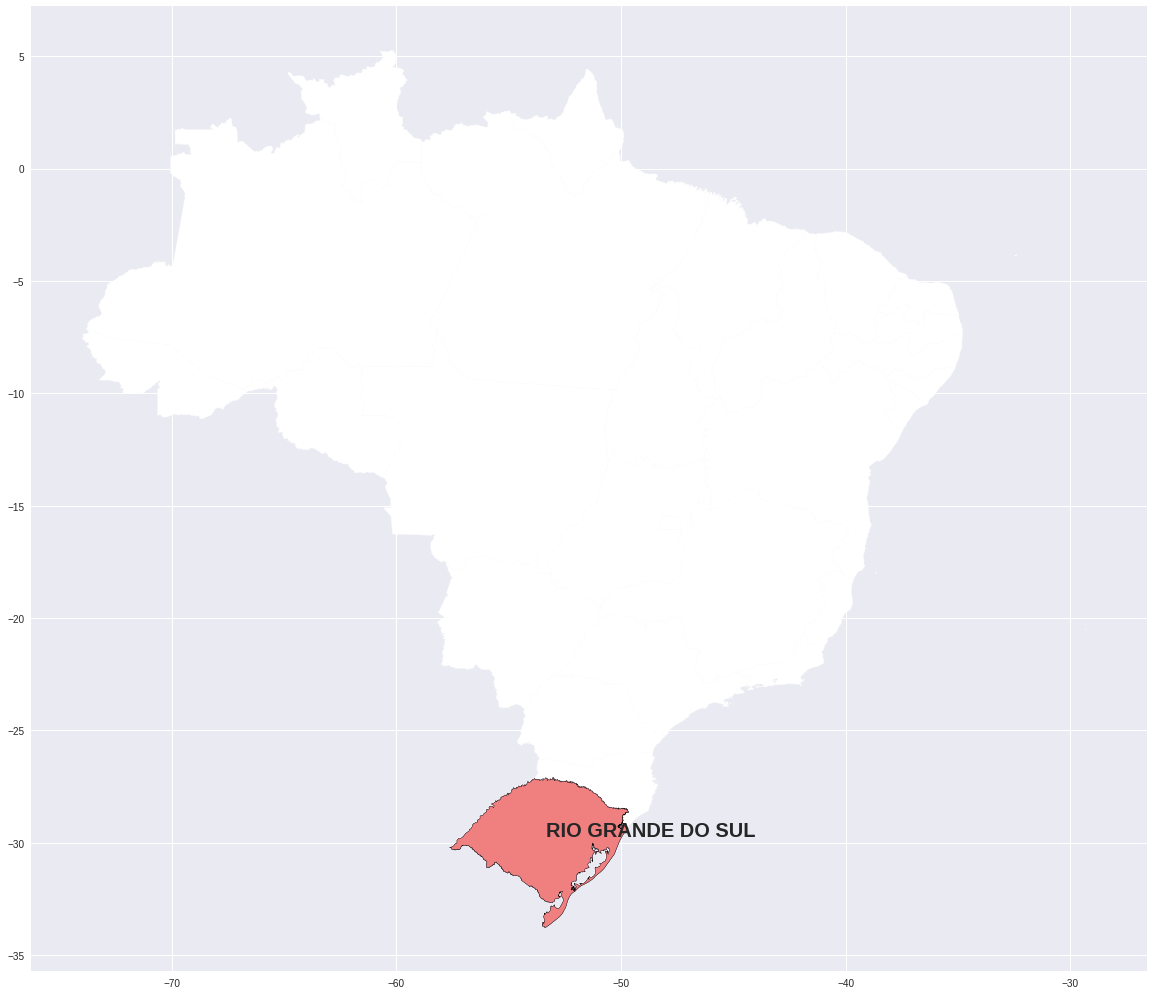

In [0]:
# Rio Grande do Sul
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['RS'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='RS'].plot(ax=base, edgecolor='black', color='lightcoral')



### Região Centro-Oeste

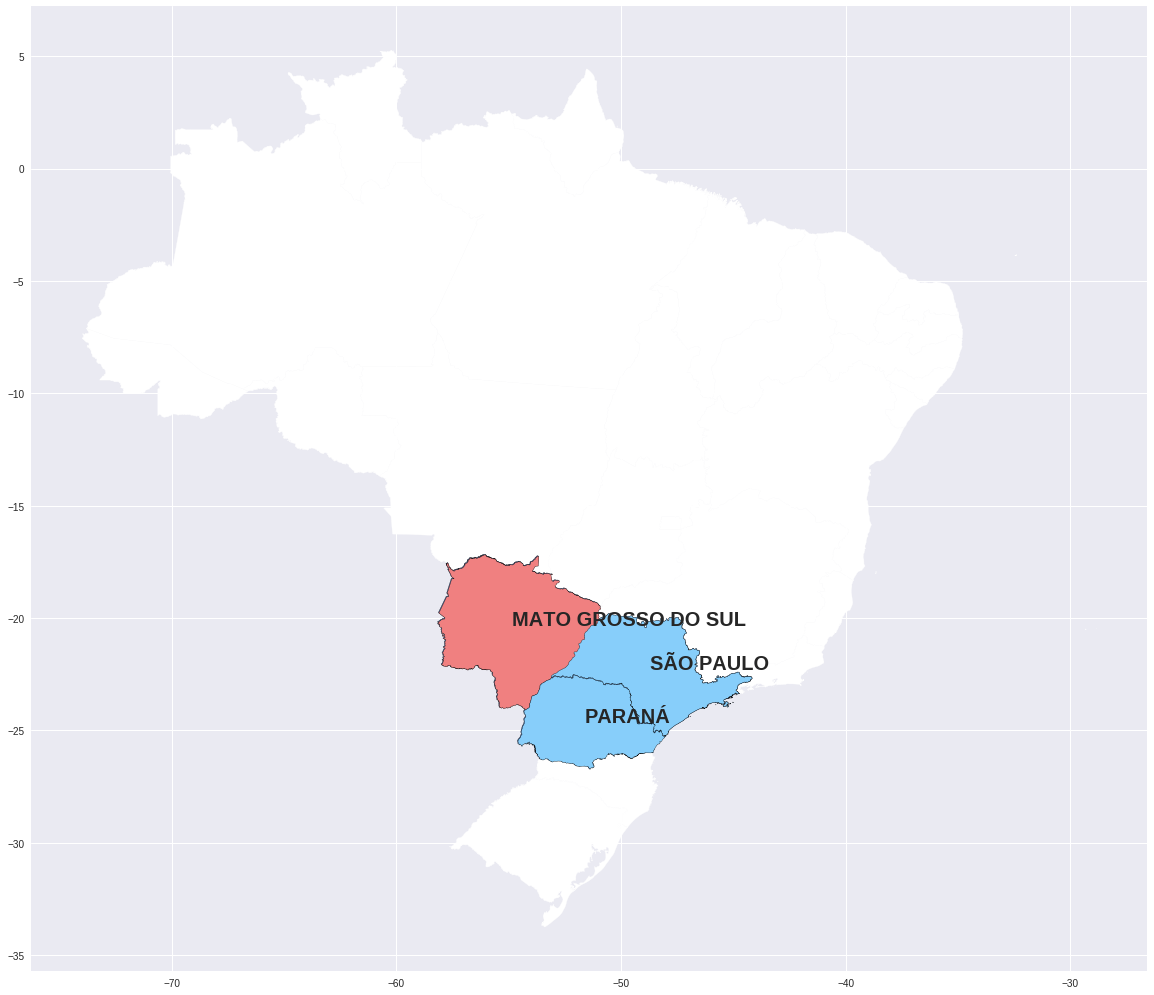

In [0]:
# Mato Grosso do Sul
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['MS', 'SP', 'PR'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
## entre 0.8 e 1
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='MS'].plot(ax=base, edgecolor='black', color='lightcoral')

# Estados de notificação fracos
## entre 0.4 e 0.5
br[br['UF']=='SP'].plot(ax=base, edgecolor='black', color='lightskyblue')
br[br['UF']=='PR'].plot(ax=base, edgecolor='black', color='lightskyblue')



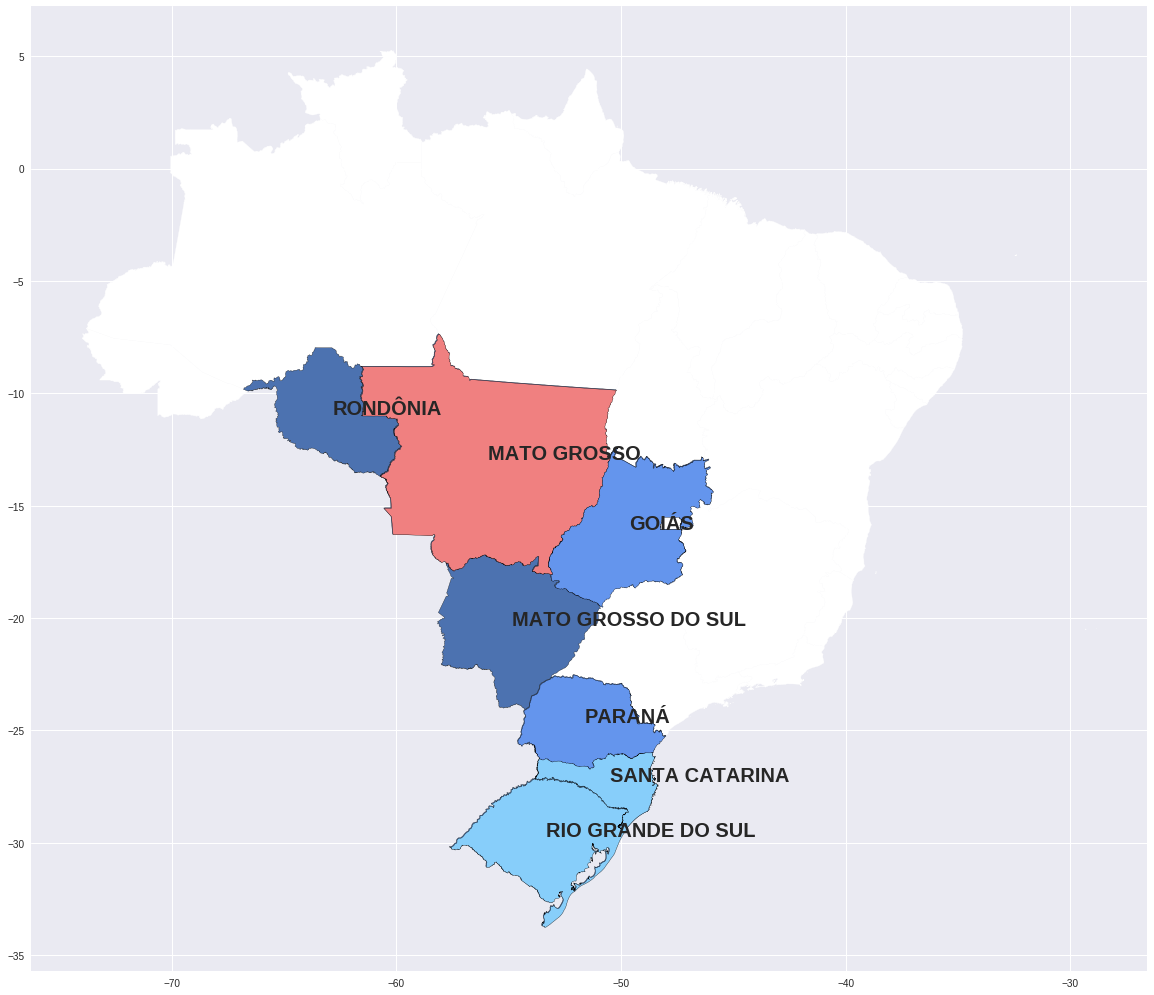

In [0]:
# Mato Grosso
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['MT', 'RO', 'SC', 'GO', 'PR','MS','RS'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='MT'].plot(ax=base, edgecolor='black', color='lightcoral')


# Estados de notificação fracos
  ## entre 0.4 e 0.5
br[br['UF']=='SC'].plot(ax=base, edgecolor='black', color='lightskyblue')
br[br['UF']=='RS'].plot(ax=base, edgecolor='black', color='lightskyblue')

  ## entre 0.6 e 0.8
br[br['UF']=='GO'].plot(ax=base, edgecolor='black', color='cornflowerblue')
br[br['UF']=='PR'].plot(ax=base, edgecolor='black', color='cornflowerblue')

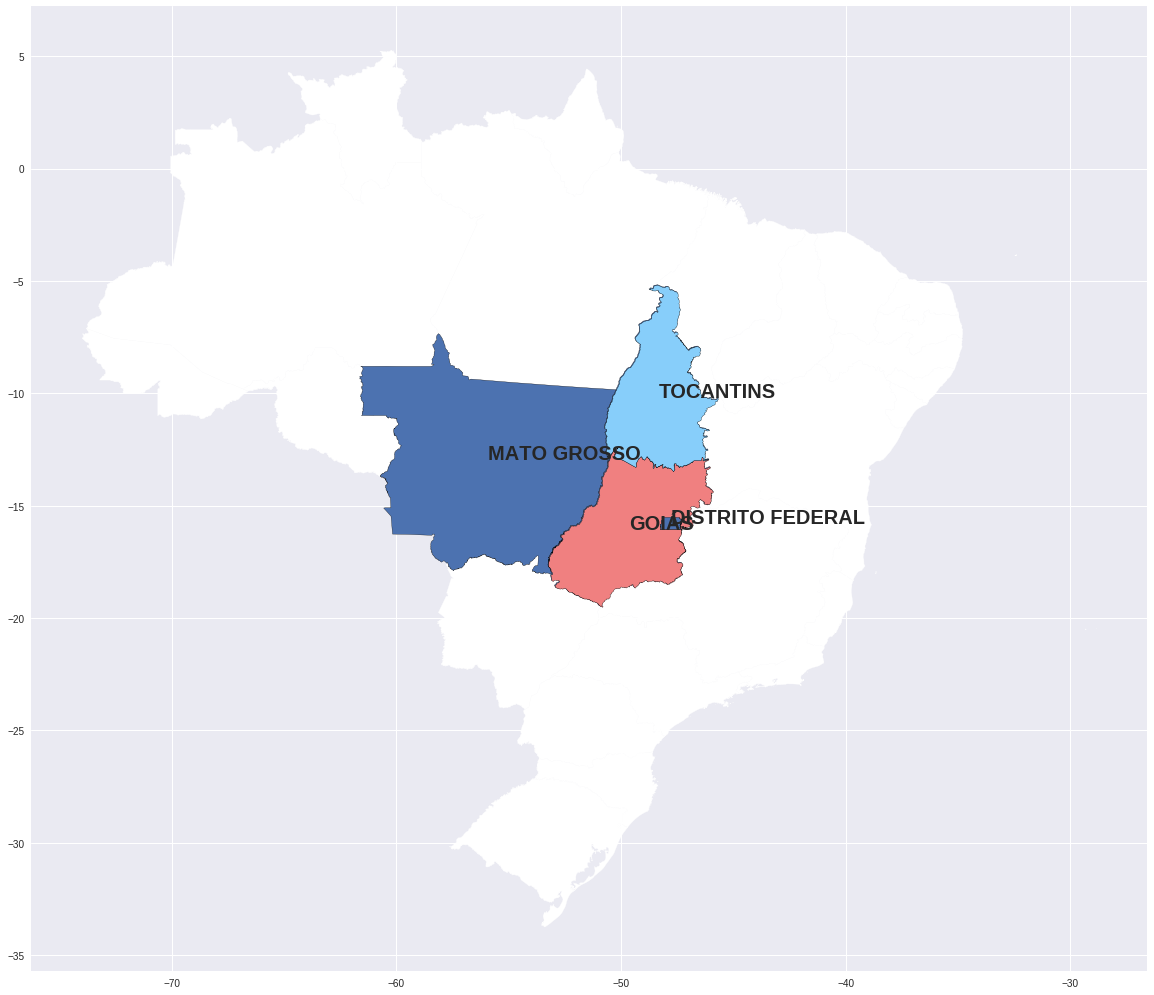

In [0]:
# Goiás
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['GO', 'DF', 'MT', 'TO'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='GO'].plot(ax=base, edgecolor='black', color='lightcoral')


# Estados de notificação fracos
  ## entre 0.4 e 0.5
br[br['UF']=='TO'].plot(ax=base, edgecolor='black', color='lightskyblue')


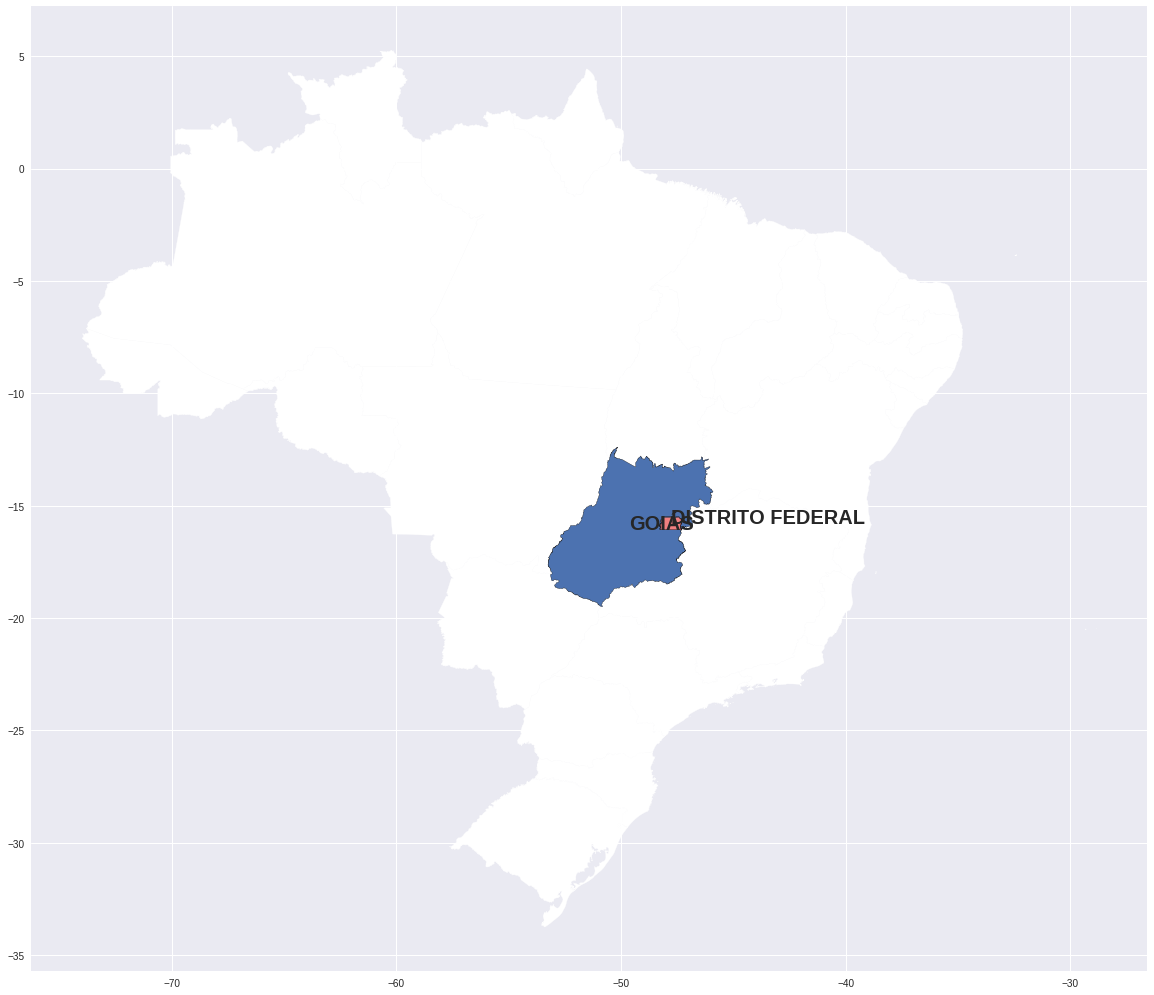

In [0]:
# Distrito Federal
base = br.plot(color='white', edgecolor='white', figsize=(20,20))

# Centroides
br_sp = br[br.UF.isin(['DF', 'GO'])]
br_sp = gpd.GeoDataFrame(br_sp, geometry='centroides')

for x, y, label in zip(br_sp.geometry.x, br_sp.geometry.y, br_sp['NM_ESTADO']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight ='bold'))

br_sp = gpd.GeoDataFrame(br_sp, geometry='geometry')

# Estados de notificação forte
br_sp.plot(ax=base, edgecolor='black')

# Estado de infecção
br[br['UF']=='DF'].plot(ax=base, edgecolor='black', color='lightcoral')


